In [115]:
import numpy as np
import matplotlib.pyplot as plt

import t2ebm

import t2ebm.graphs as graphs

In [116]:
np.log(x+10)
np.sqrt(x+10)
np.abs(2*x+5)
1/(1+np.exp(-x))
2 ** (x-5)
np.sin(x) + np.sin(2*x)
(x−1)(x+1)

SyntaxError: invalid character '−' (U+2212) (442941767.py, line 7)

In [ ]:
1/2 * (x+1) ** 4 - 5 * (x+2) **3 + 3 * x ** 2 + 2 * x + 1

-1/2 * (x+1) ** 4 + 5 * (x+2) **3 + 3 * x ** 2 + 2 * x + 1

np.sign(x ** 2 - 15)
np.abs(x ** 2 - 20)
np.abs(x) ** (1/10)
np.sin(x) + np.sin(3*x)
np.sin(x) + np.sin(0.5 * x)
np.abs(x) - np.sin(x)
np.abs(x) - np.cos(x)
np.abs(x) + np.sin(x)
np.abs(x) + np.cos(x)
np.sign(x) + np.cos(x)
x ** 3 + 250 * np.sin(x)


45

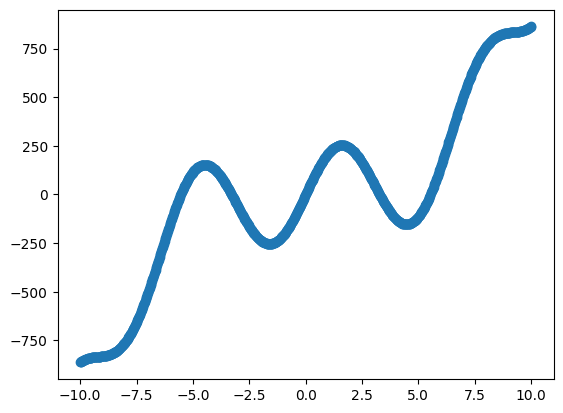

In [226]:
# for each, function draw 1000 samples from a uniform distribution and plot the function
function_points = []
x = np.linspace(-10, 10, 1000)
y = x ** 3 + 250 * np.sin(x)
plt.scatter(x, y)
plt.show()

# F-Bench

30


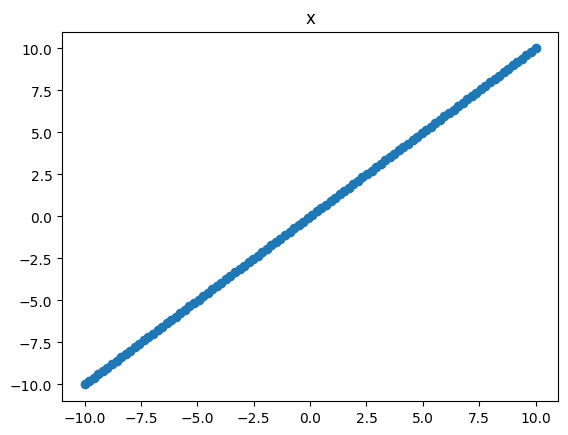

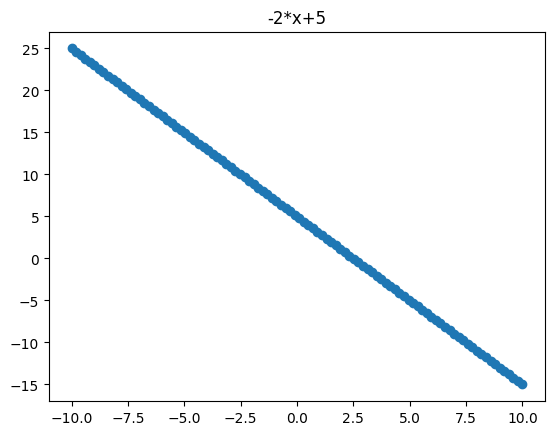

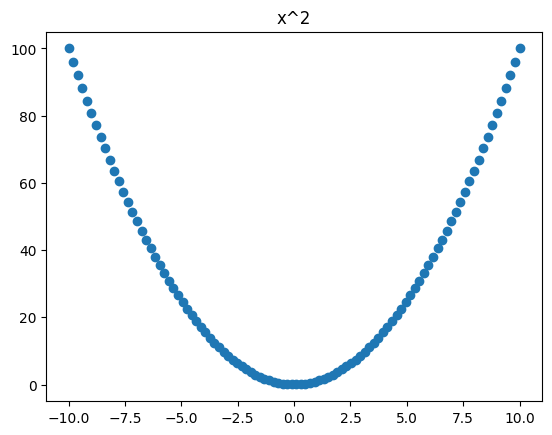

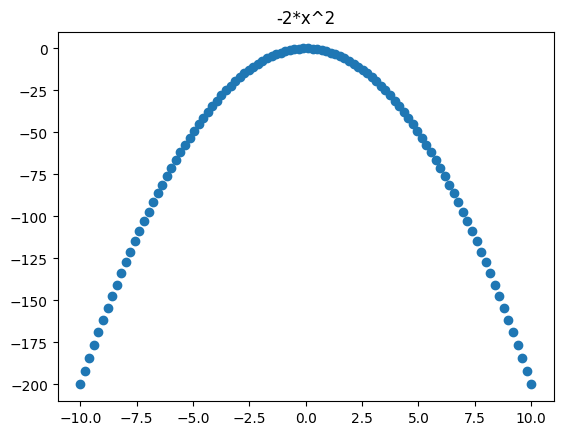

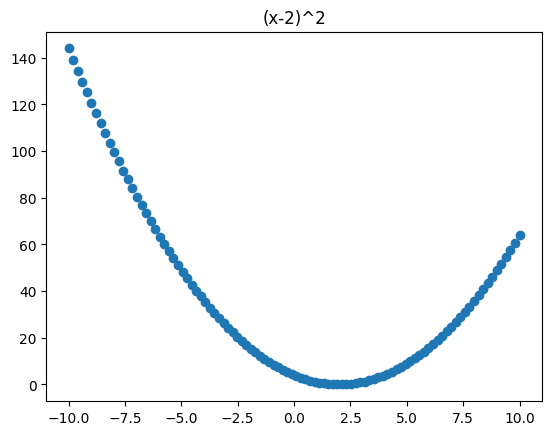

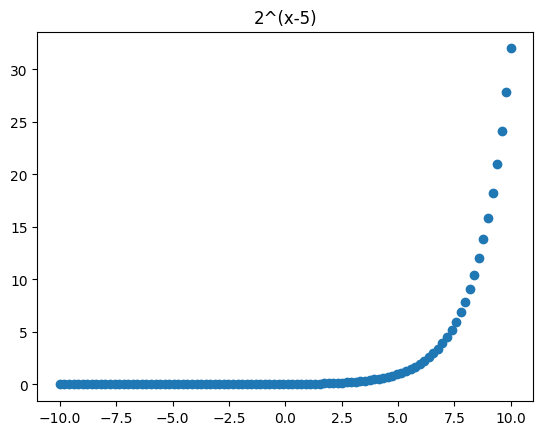

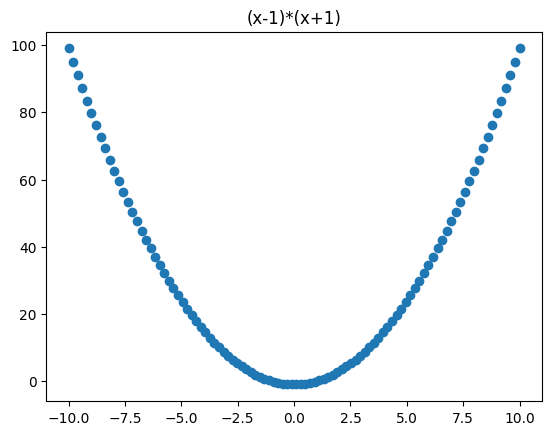

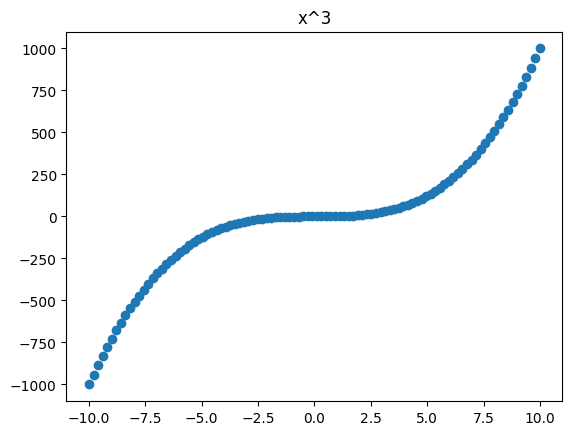

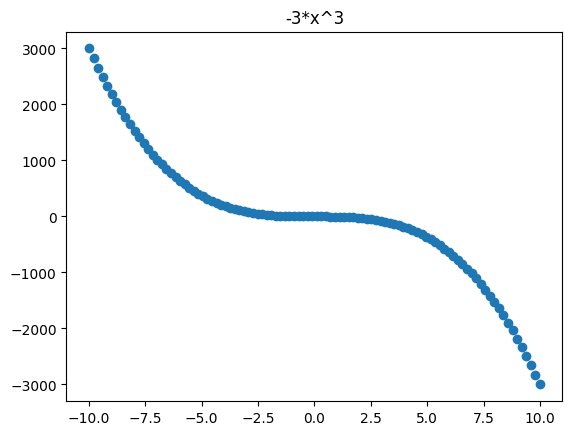

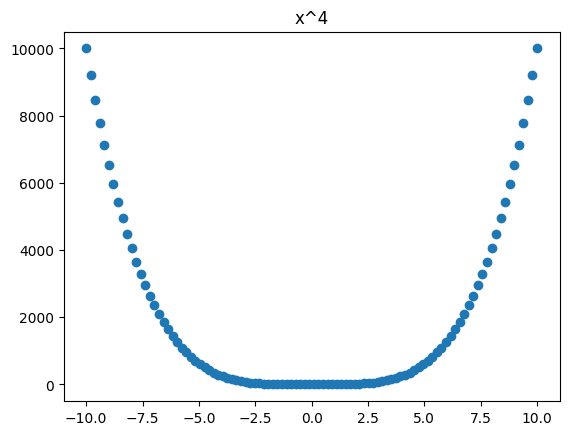

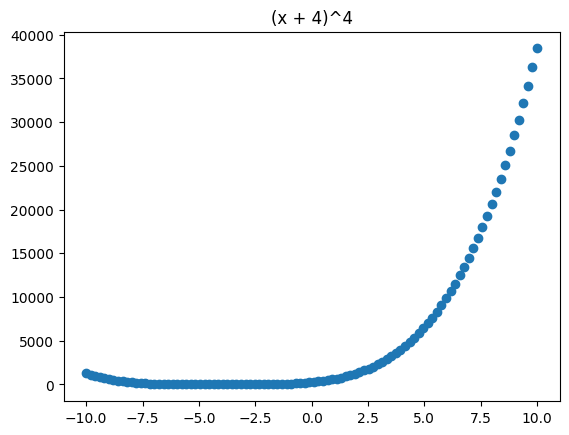

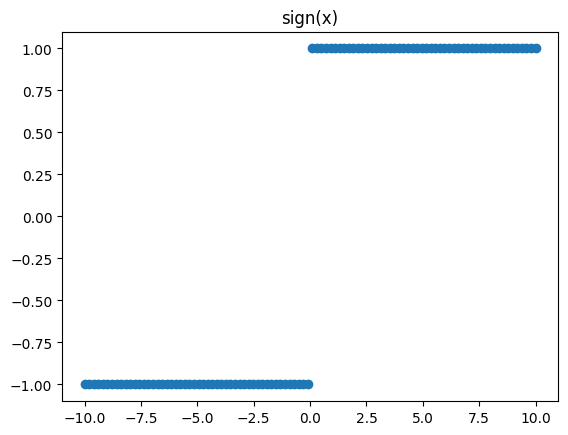

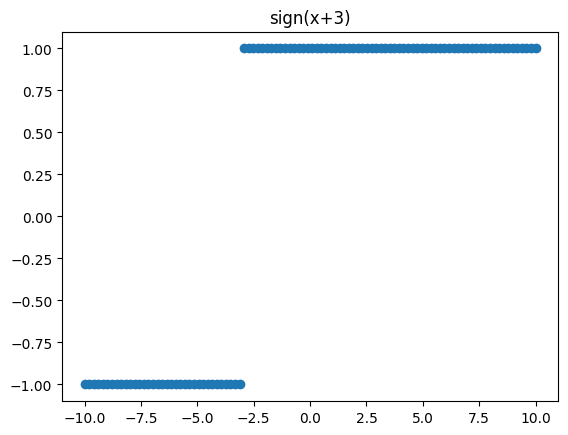

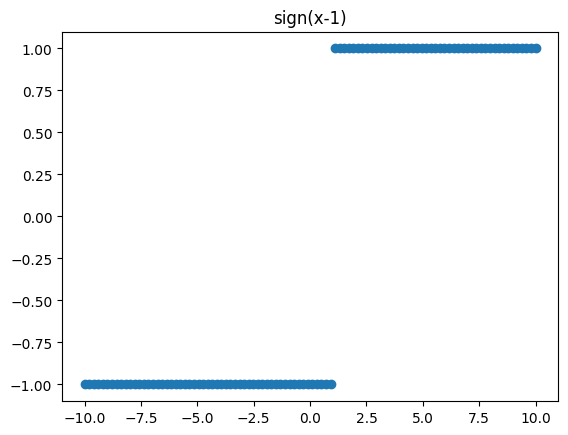

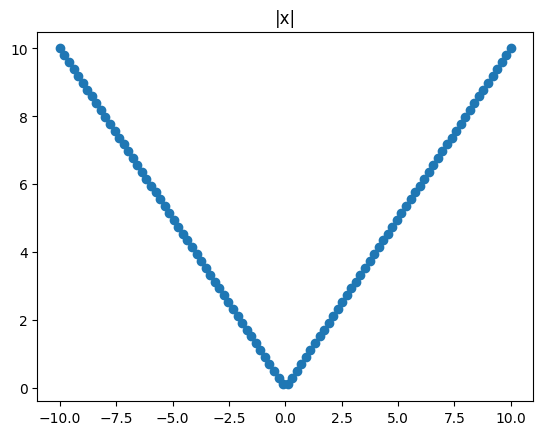

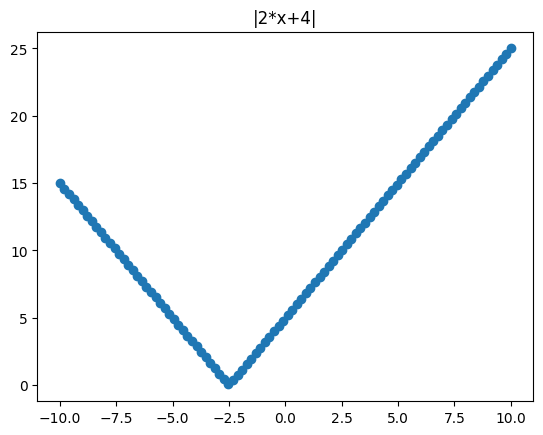

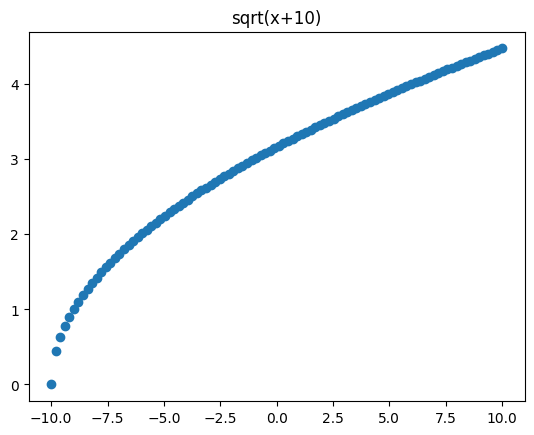

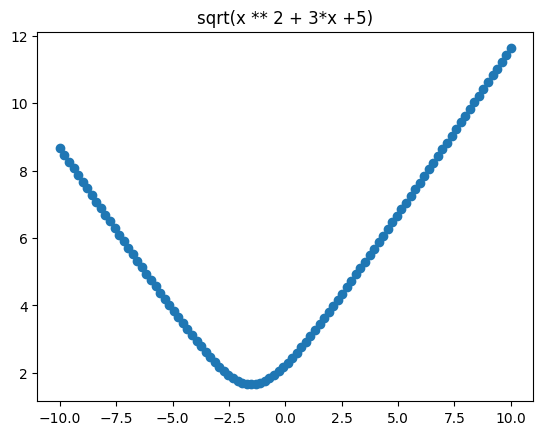

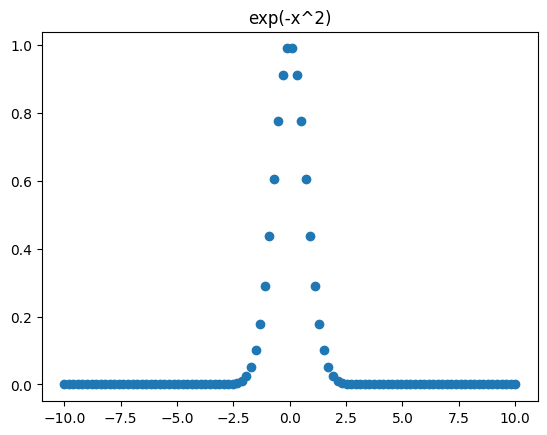

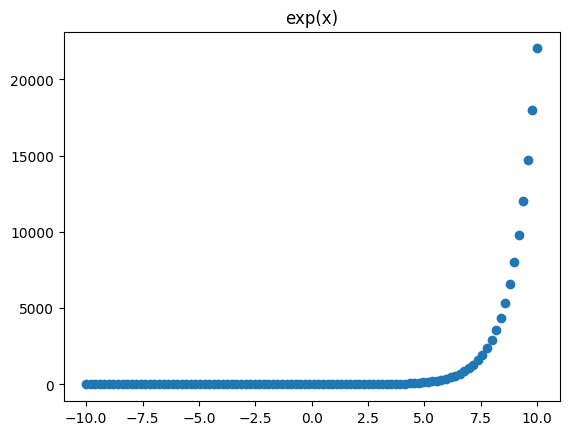

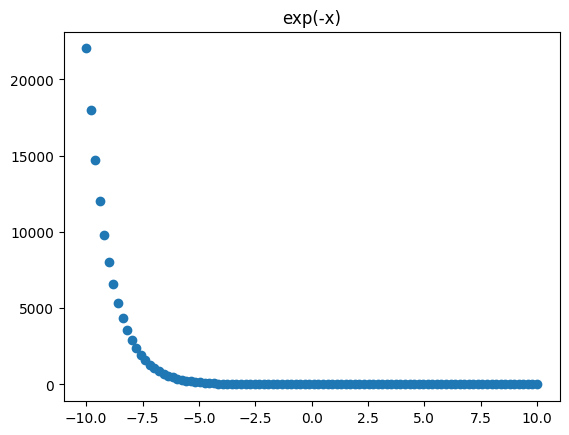

/tmp/ipykernel_288061/2008396885.py:34: RuntimeWarning: divide by zero encountered in log
  (lambda x: np.log(x+10), 'log(x+10)'),


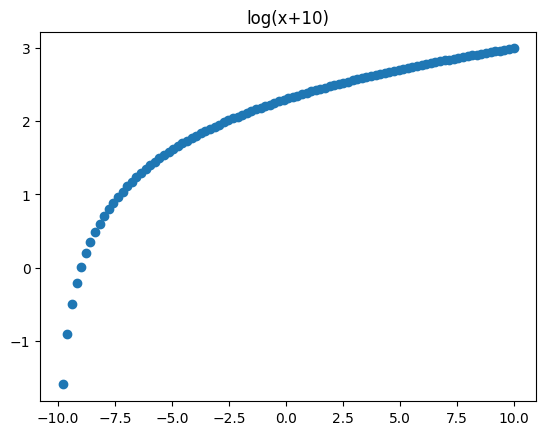

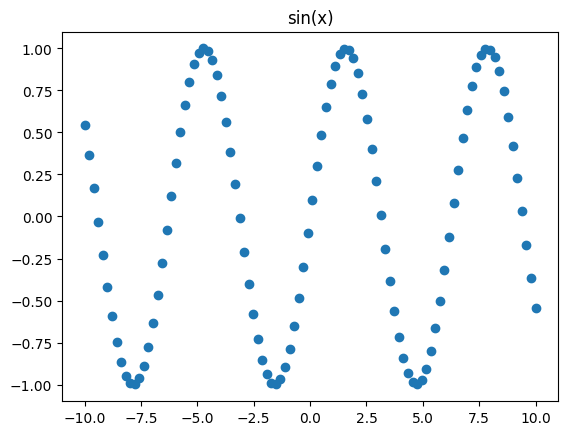

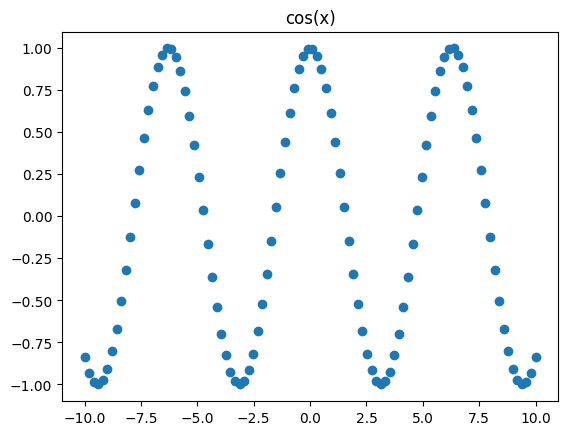

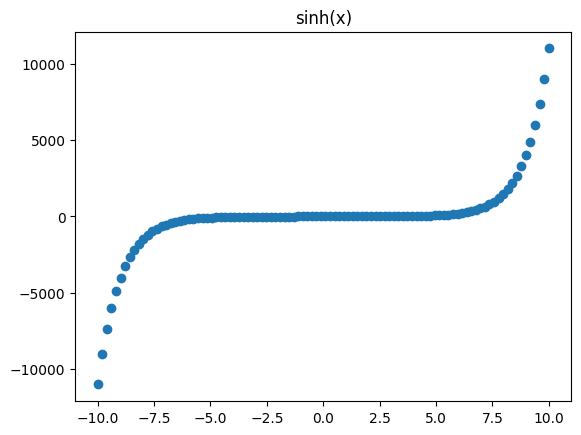

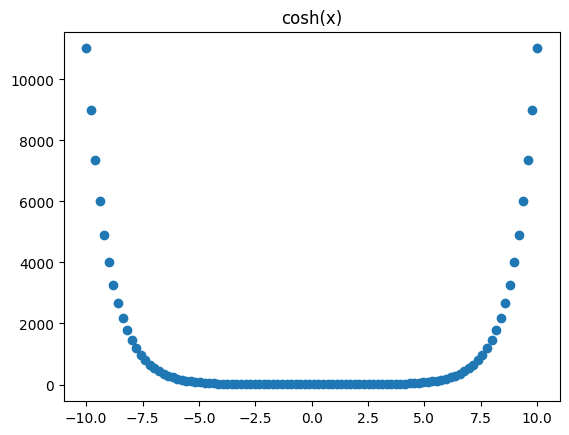

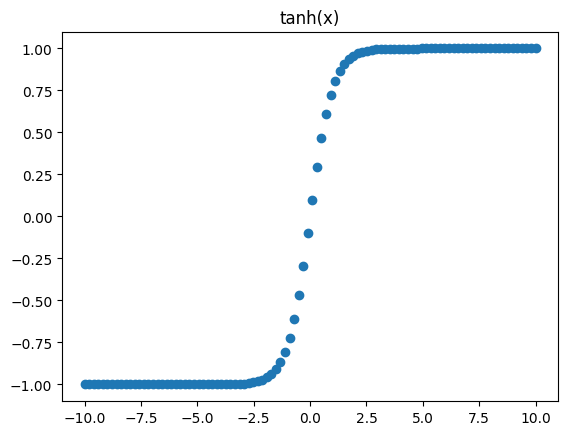

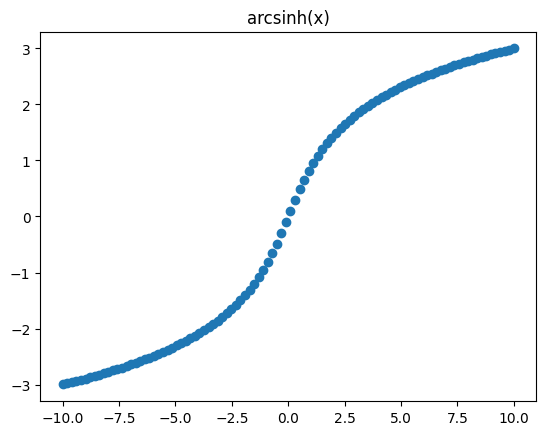

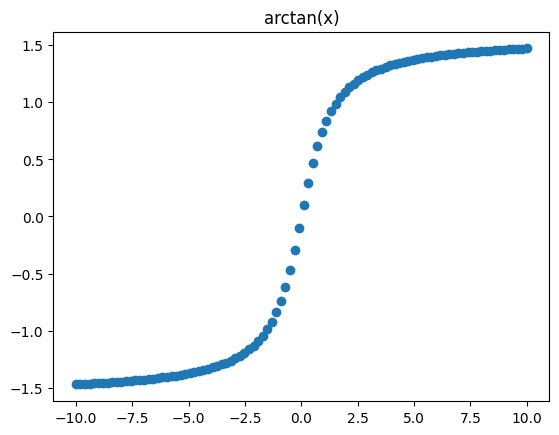

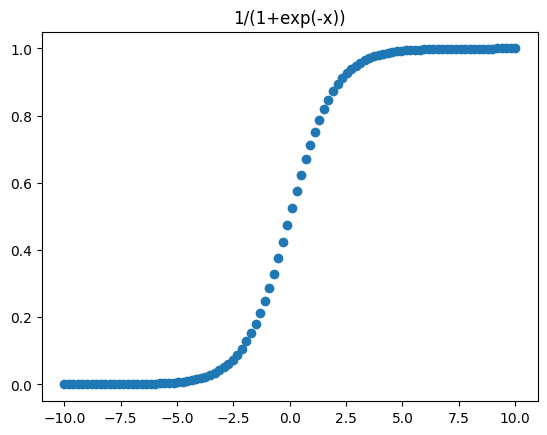

In [132]:
fbench = [
    # polynomials
    (lambda x: x, 'x'),
    (lambda x: -2*x+5, '-2*x+5'),
    (lambda x: x**2, 'x^2'),
    (lambda x: -2*x**2, '-2*x^2'),
    (lambda x: (x-2)**2, '(x-2)^2'),
    (lambda x: 2 ** (x-5), '2^(x-5)'),
    (lambda x: (x-1)*(x+1), '(x-1)*(x+1)'),
    (lambda x: x**3, 'x^3'),
    (lambda x: -3*x**3, '-3*x^3'),
    (lambda x: x ** 4, 'x^4'),
    (lambda x: (x + 4) ** 4, '(x + 4)^4'),

    # sign
    (lambda x: np.sign(x), 'sign(x)'),
    (lambda x: np.sign(x+3), 'sign(x+3)'),
    (lambda x: np.sign(x-1), 'sign(x-1)'),

    # abs
    (lambda x: np.abs(x), '|x|'),
    (lambda x: np.abs(2*x+5), '|2*x+4|'),

    # root
    (lambda x: np.sqrt(x+10), 'sqrt(x+10)'),
    (lambda x: np.sqrt(x ** 2 + 3*x + 5), 'sqrt(x ** 2 + 3*x +5)'),

    # exponential
    (lambda x: np.exp(-x**2), 'exp(-x^2)'),
    (lambda x: np.exp(x), 'exp(x)'),
    (lambda x: np.exp(-x), 'exp(-x)'),

    # logarithm
    (lambda x: np.log(x+10), 'log(x+10)'),

    # trigonometric
    (lambda x: np.sin(x), 'sin(x)'),
    (lambda x: np.cos(x), 'cos(x)'),
    (lambda x: np.sinh(x), 'sinh(x)'),
    (lambda x: np.cosh(x), 'cosh(x)'),
    (lambda x: np.tanh(x), 'tanh(x)'),
    (lambda x: np.arcsinh(x), 'arcsinh(x)'),
    (lambda x: np.arctan(x), 'arctan(x)'),

    # logistic function
    (lambda x: 1/(1+np.exp(-x)), '1/(1+exp(-x))'),
]

print(len(fbench))

# for each, function draw 1000 samples from a uniform distribution and plot the function
x = np.linspace(-10, 10, 100)
for f, n in fbench:
    y = f(x)
    plt.scatter(x, y)
    plt.title(n)
    plt.show()

### mc with 5 choices each

In [142]:
fbench_questions[27]

([27, 2, 20, 0, 14], 27)

0


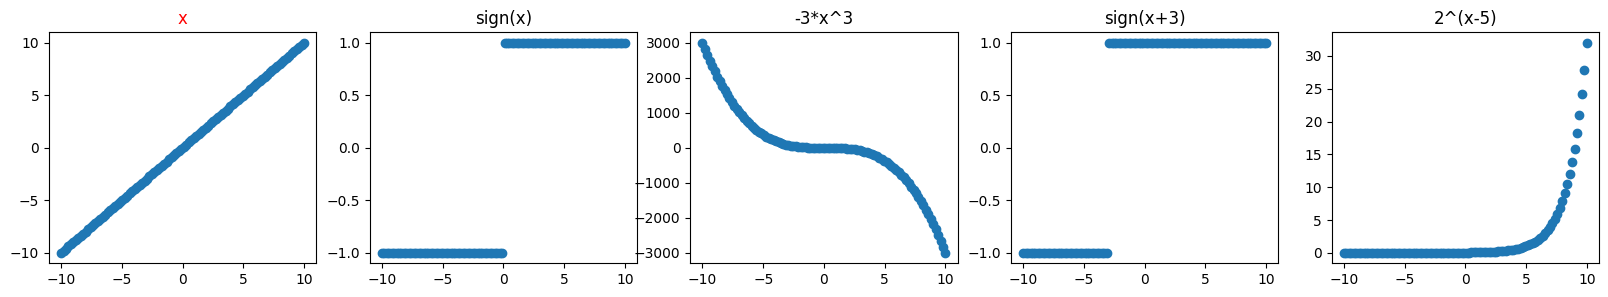

1


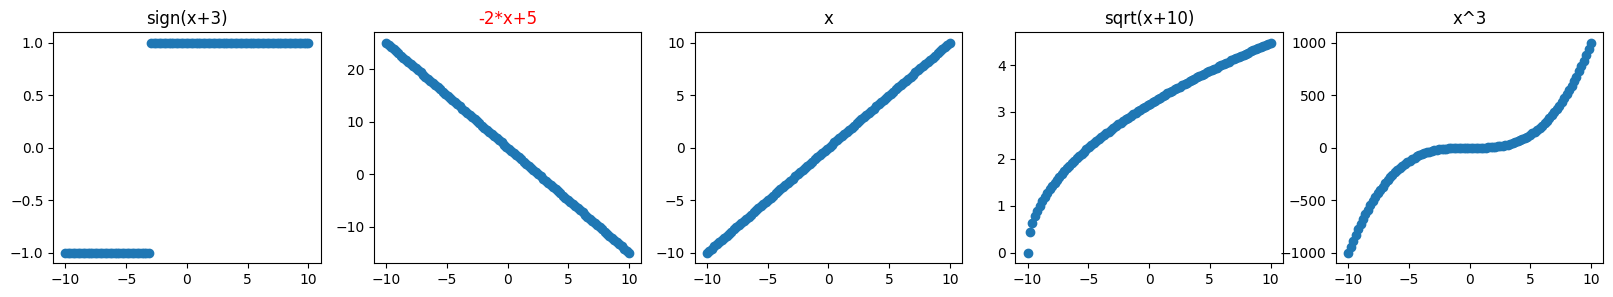

2


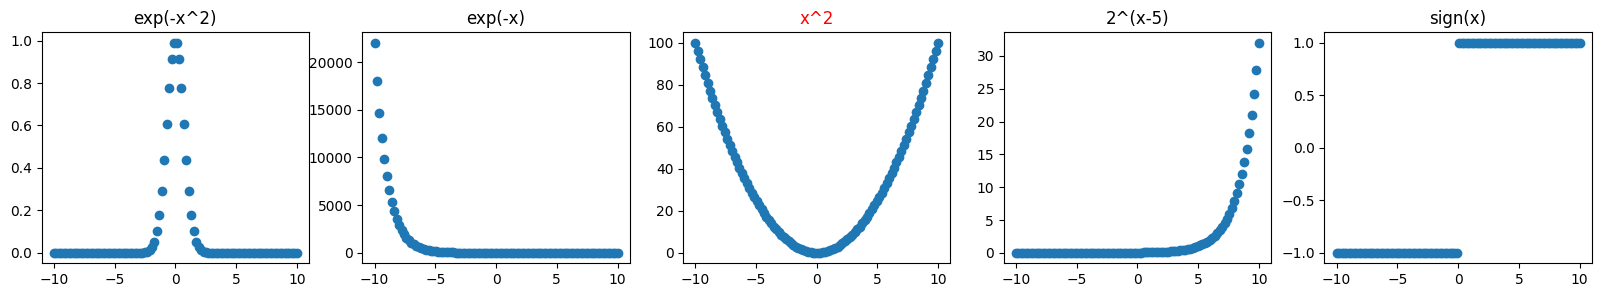

3


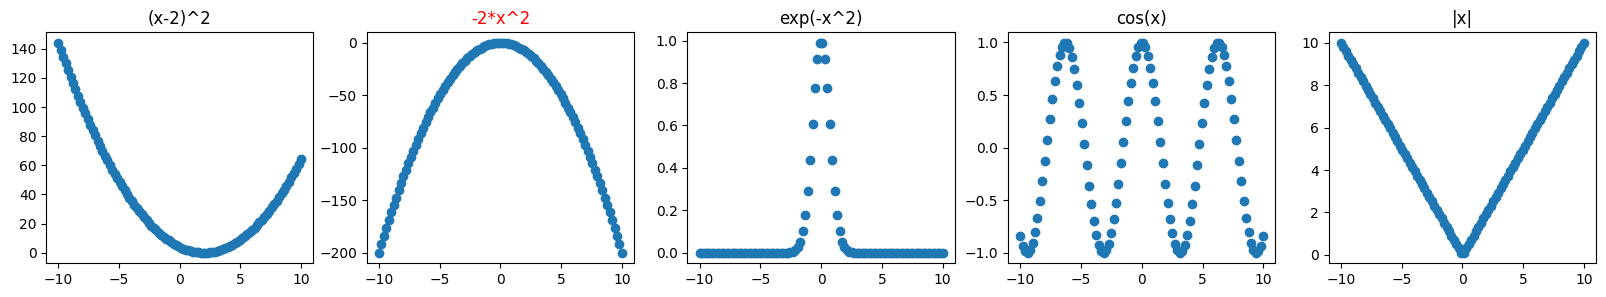

4


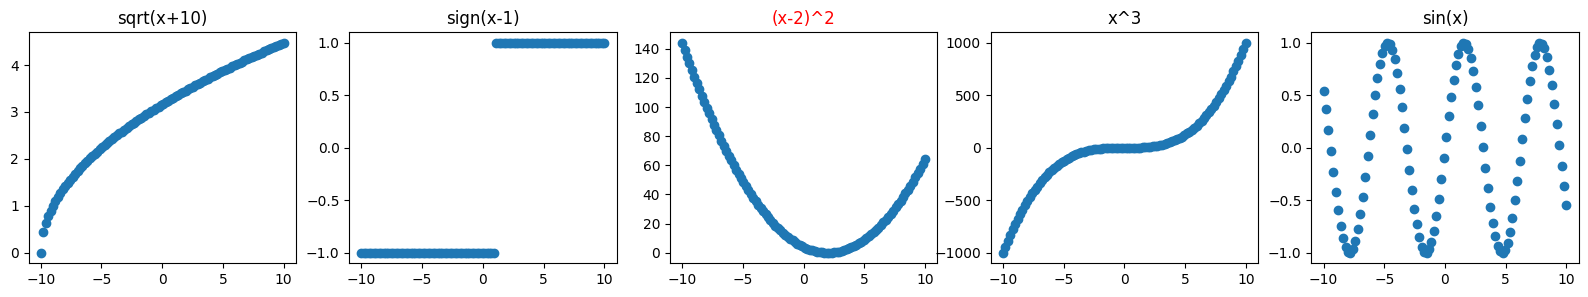

5


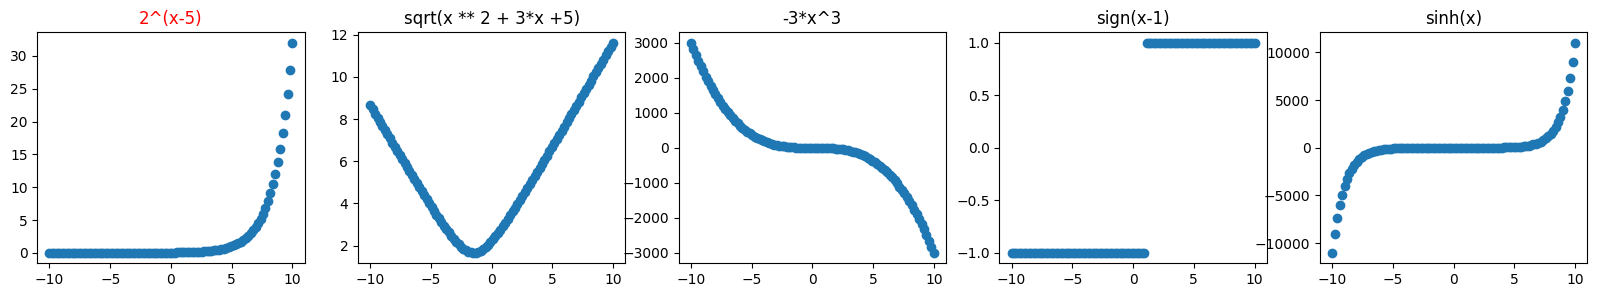

6


/tmp/ipykernel_288061/2008396885.py:34: RuntimeWarning: divide by zero encountered in log
  (lambda x: np.log(x+10), 'log(x+10)'),


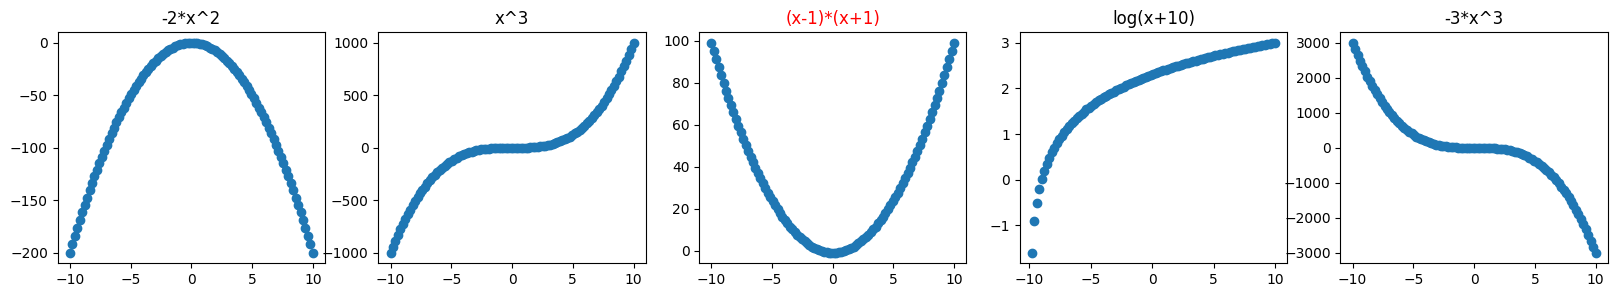

7


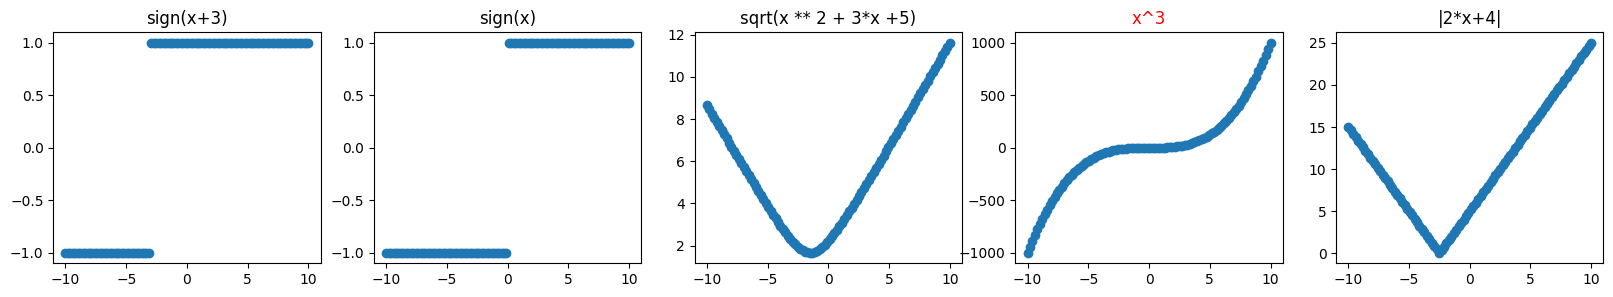

8


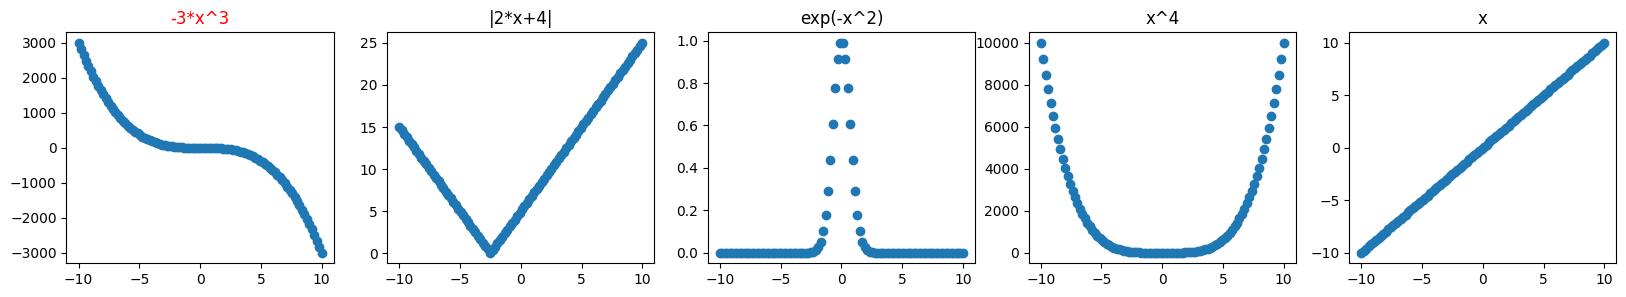

9


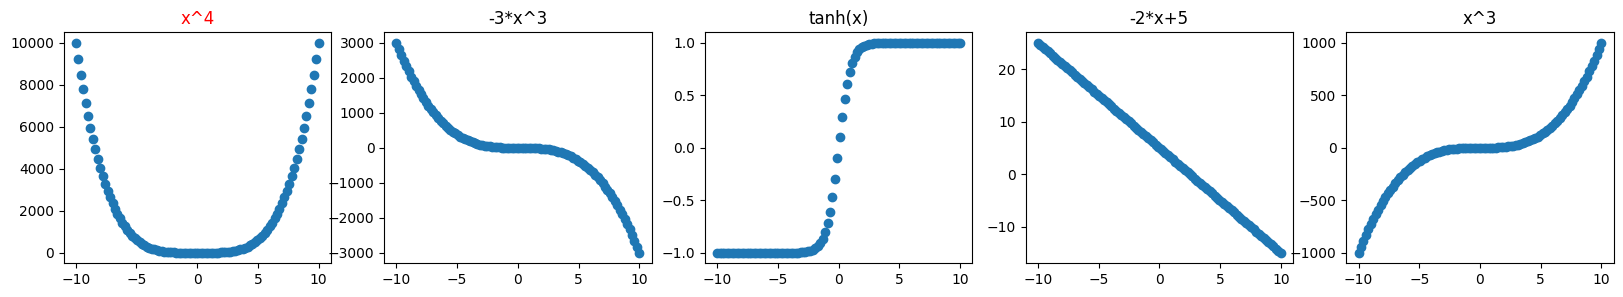

10


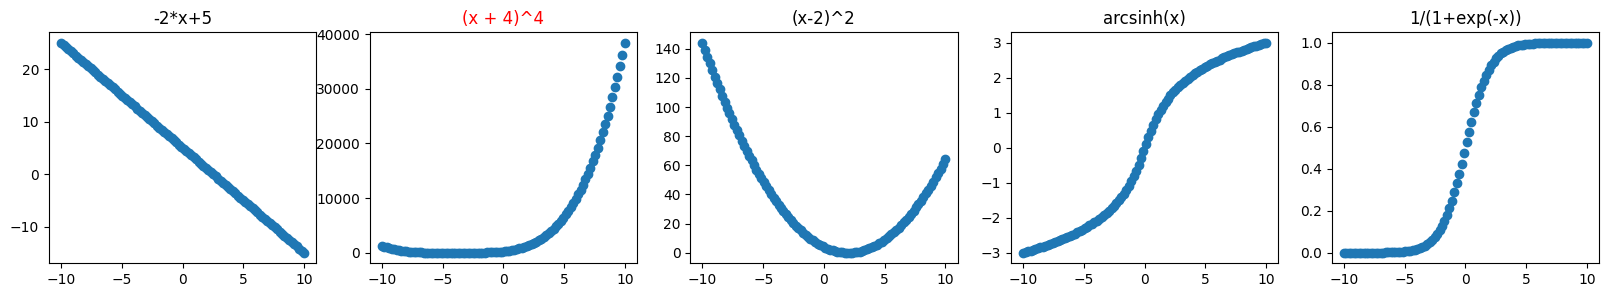

11


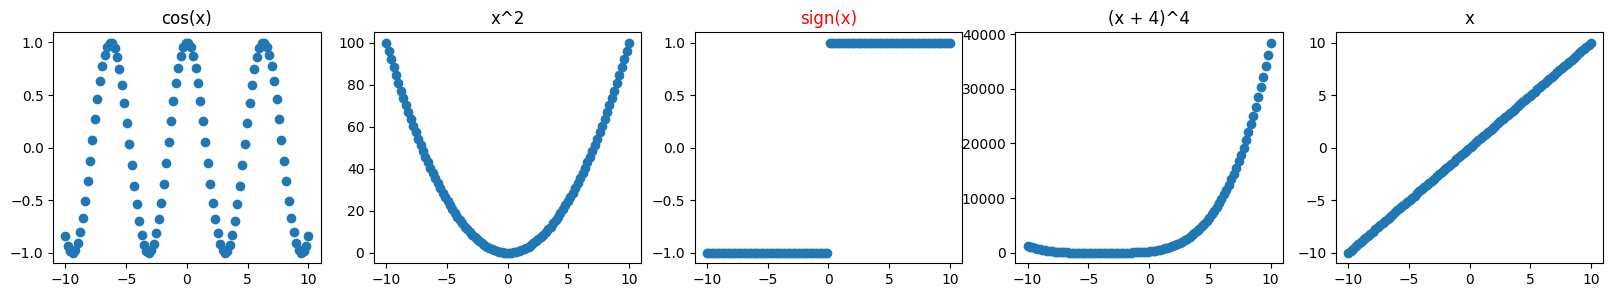

12


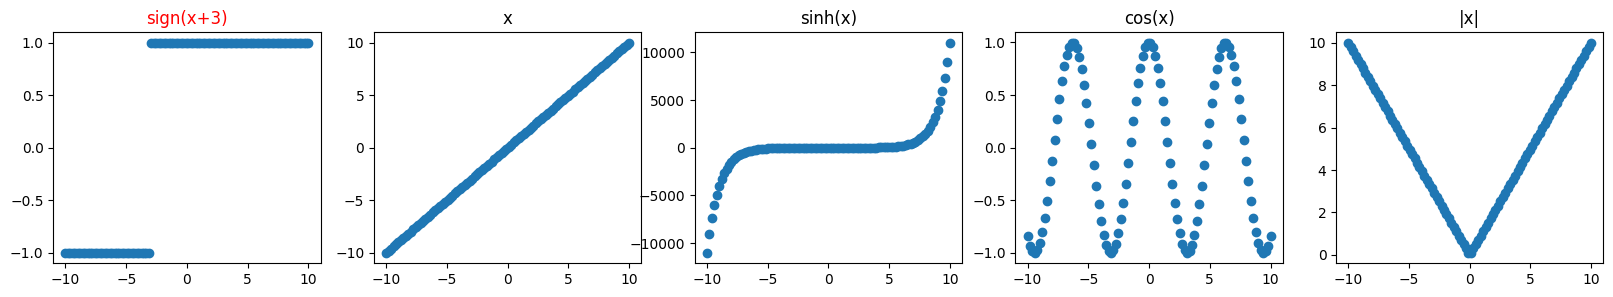

13


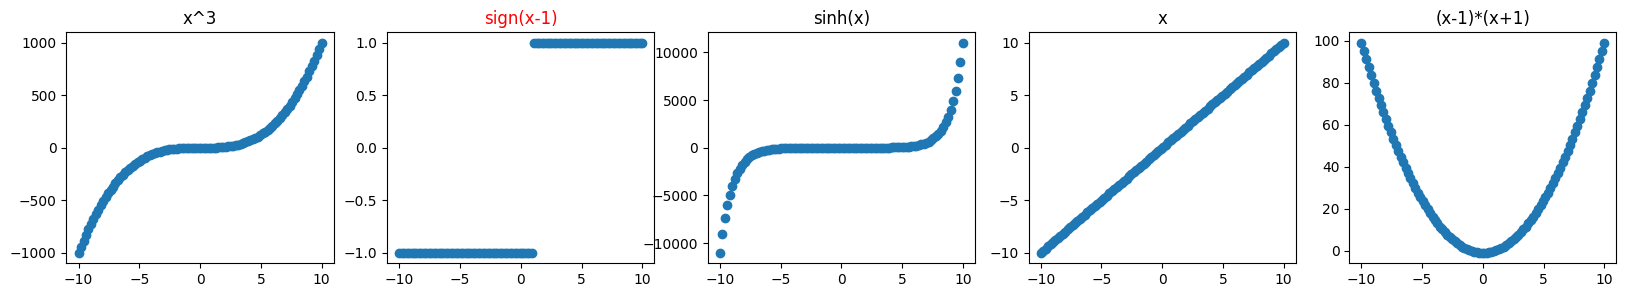

14


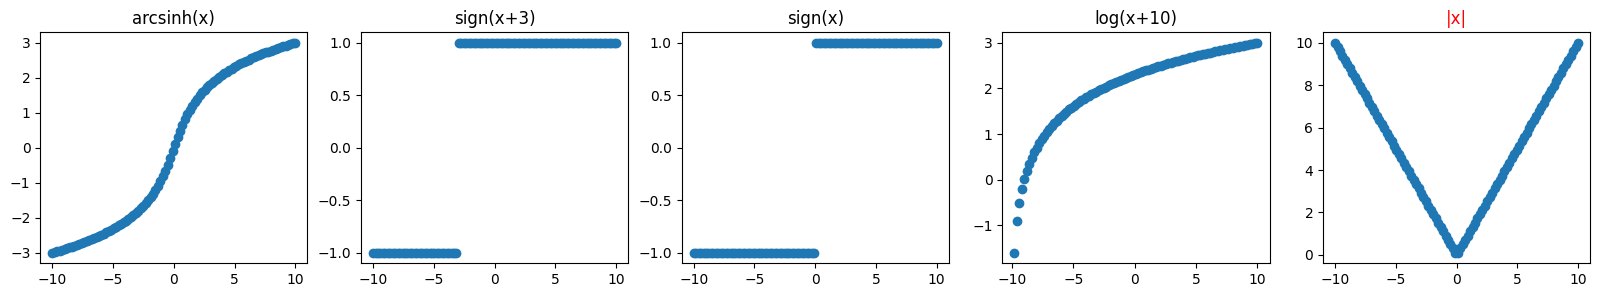

15


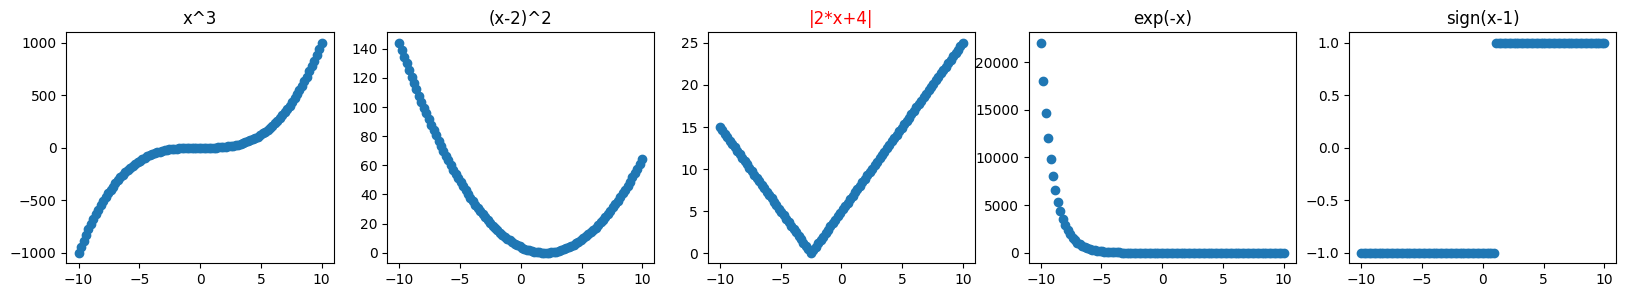

16


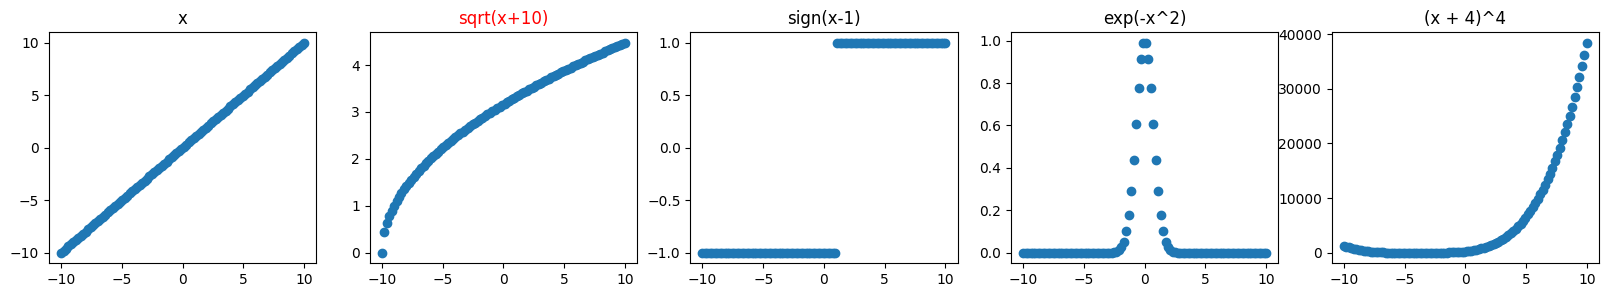

17


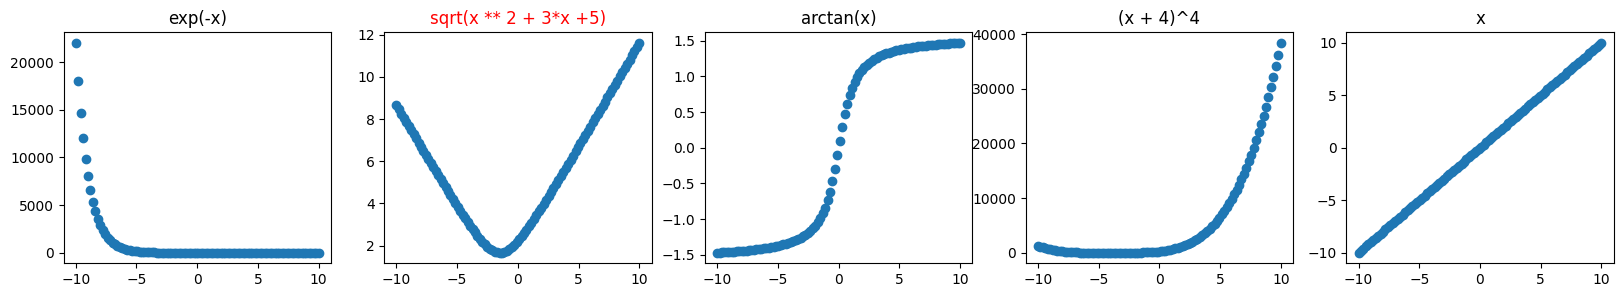

18


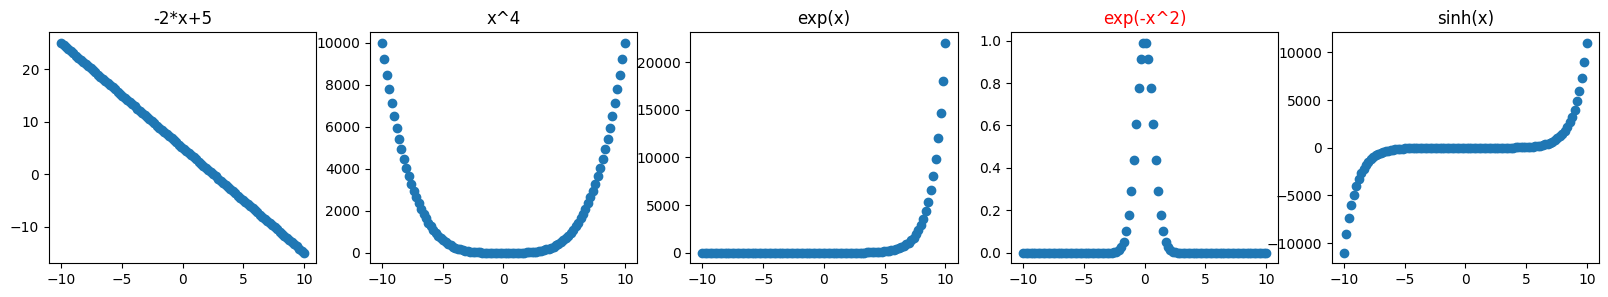

19


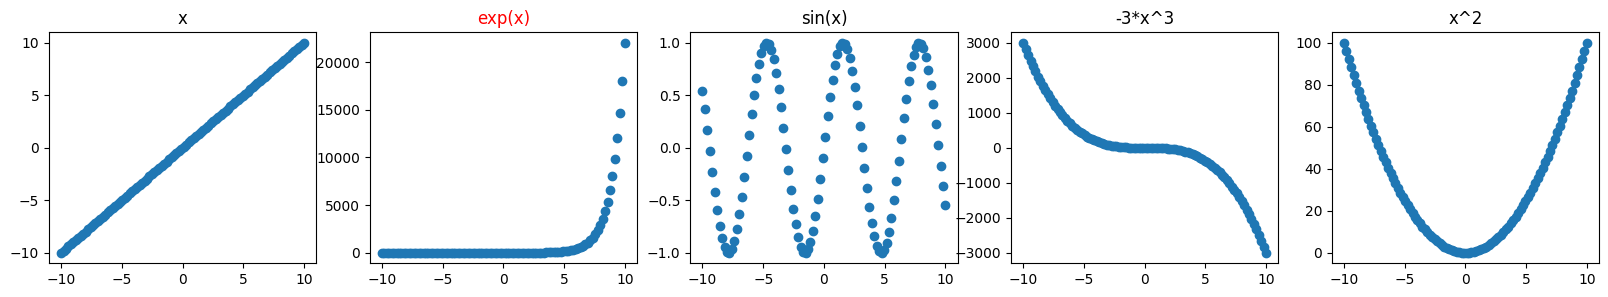

20


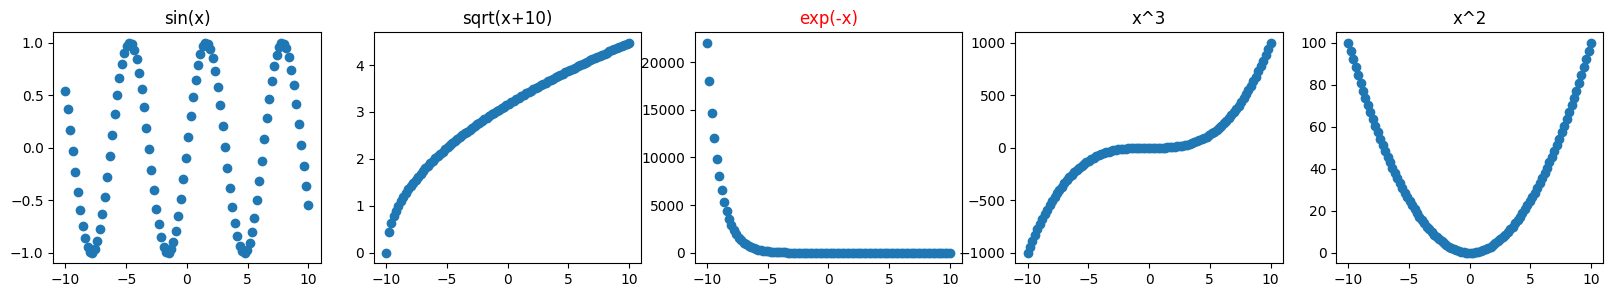

21


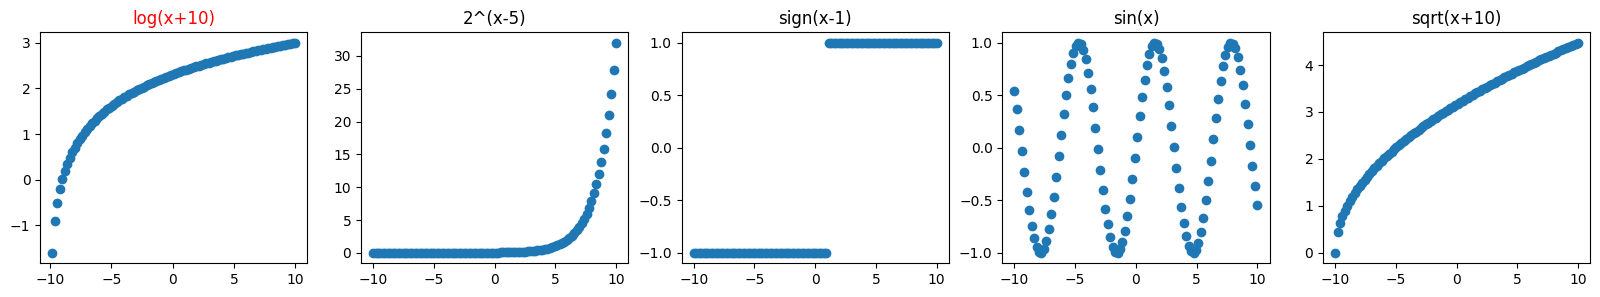

22


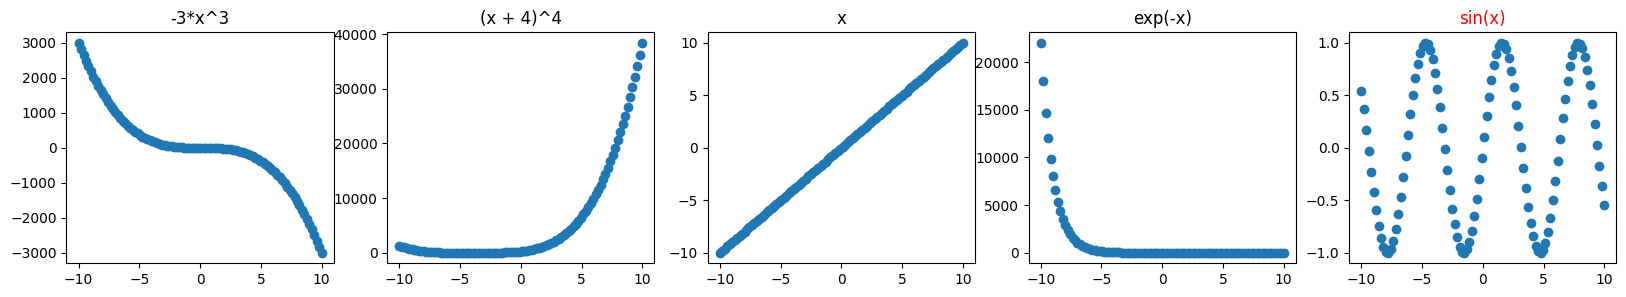

23


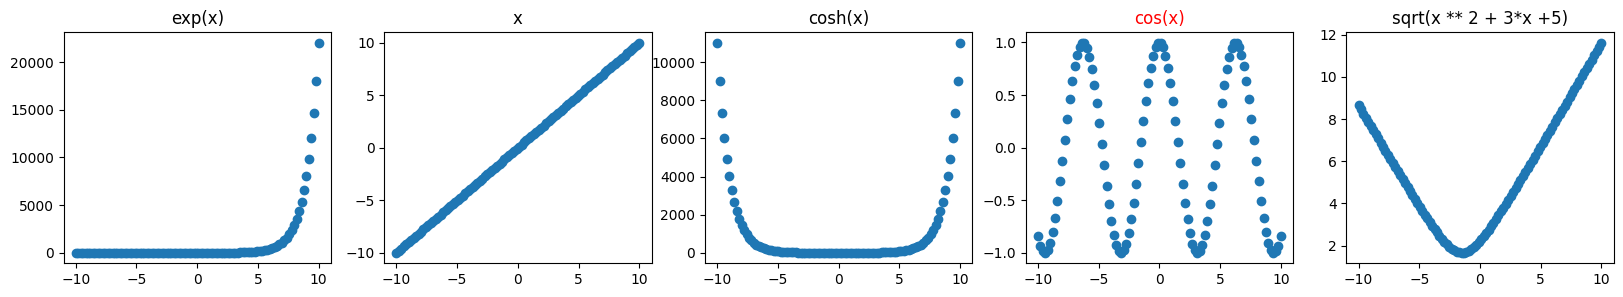

24


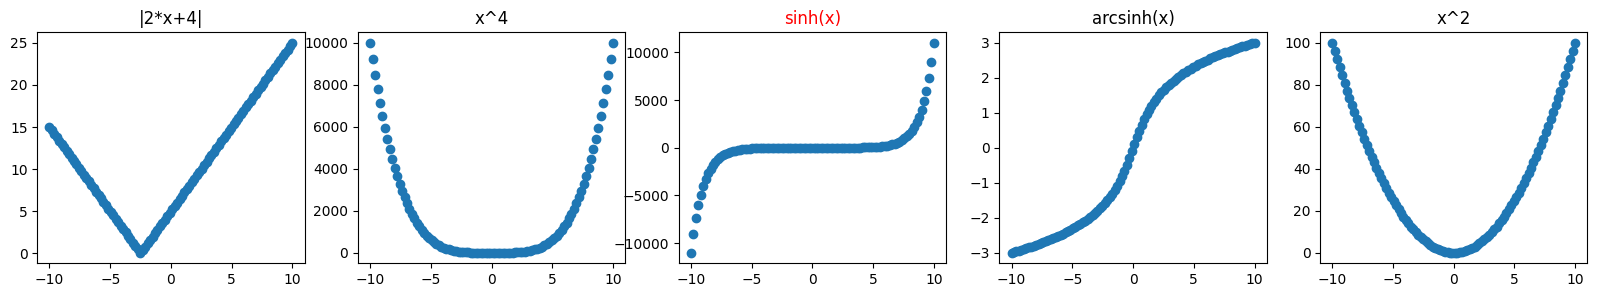

25


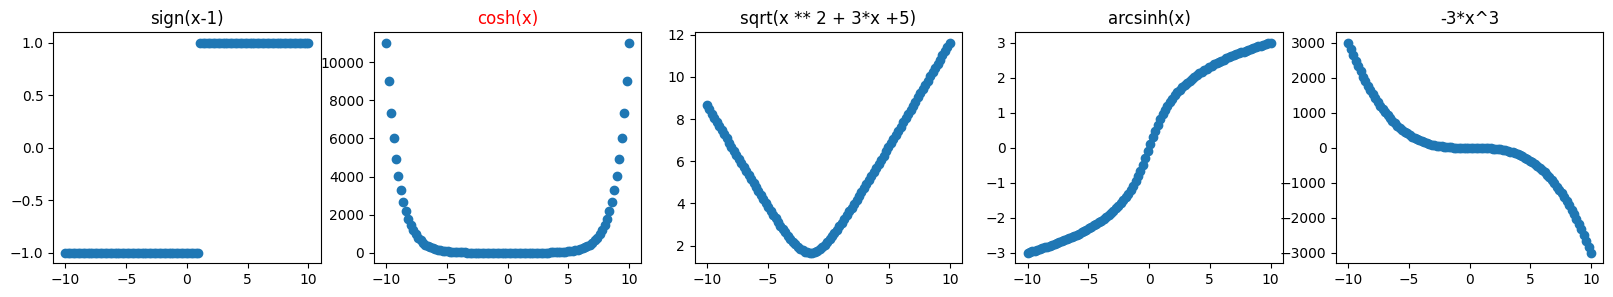

26


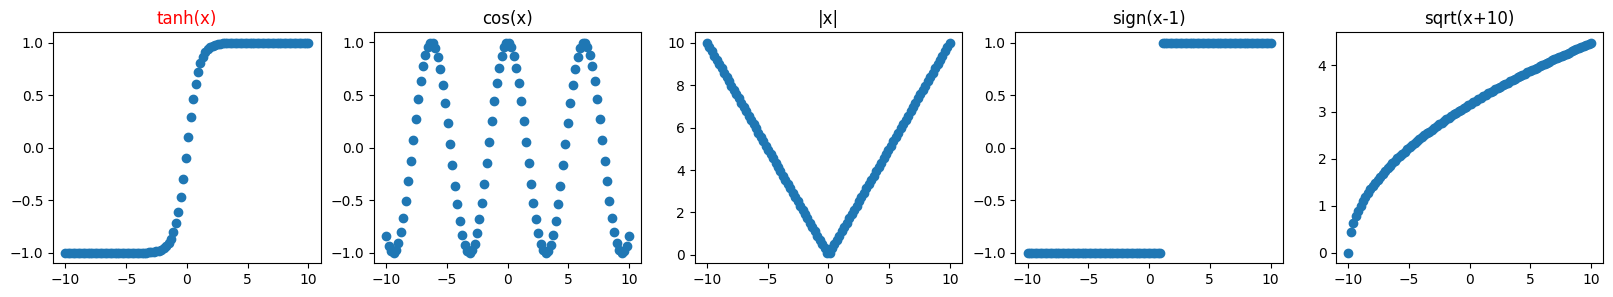

27


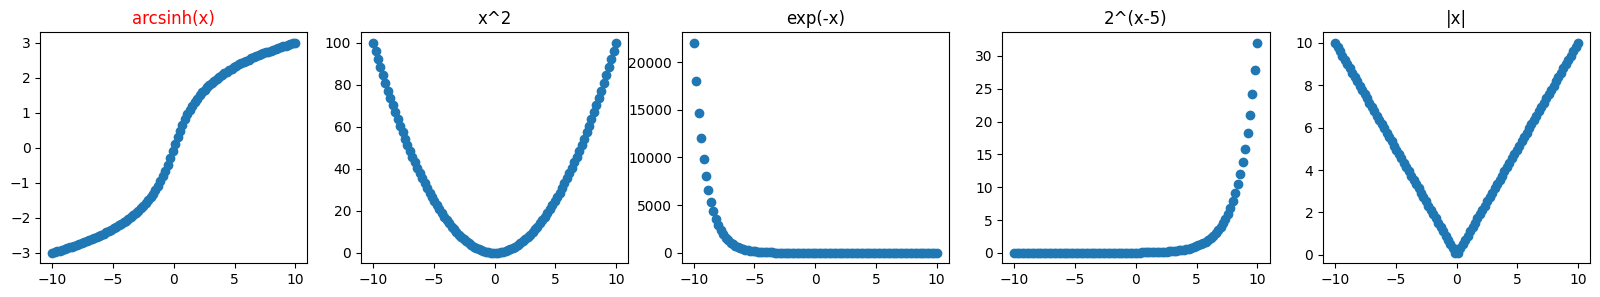

28


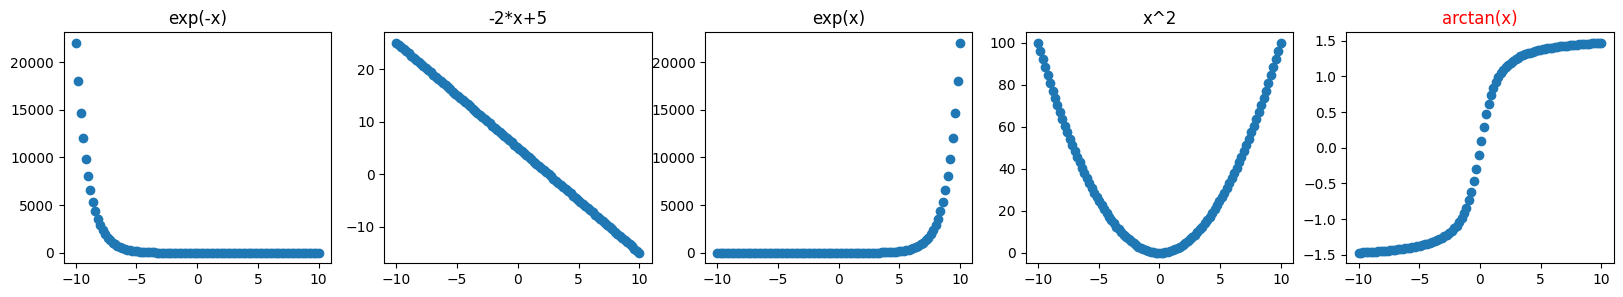

29


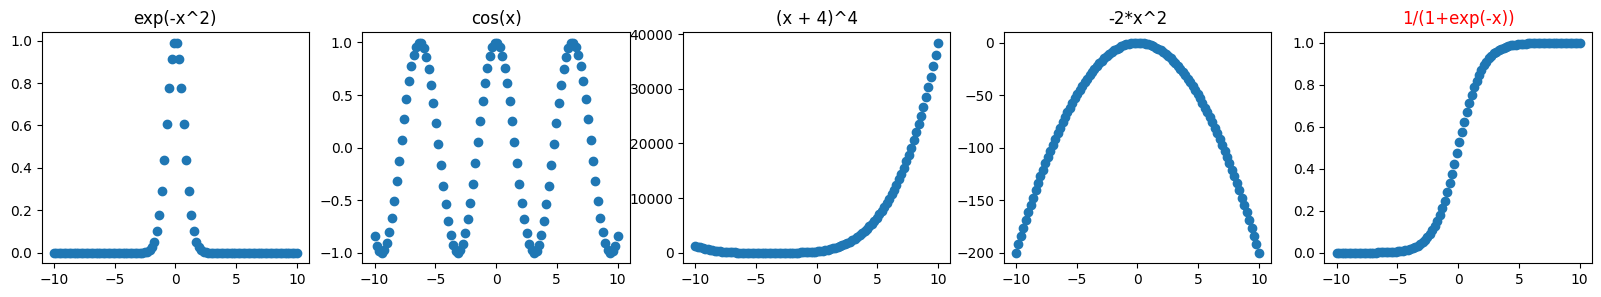

In [144]:
# first, randomly select the other multiple choice options
np.random.seed(1)
fbench_questions = []
for idx, _ in enumerate(fbench):
    mc_options = [idx]
    # select 4 more random functions
    for _ in range(4):
        random_idx = np.random.randint(0, len(fbench))
        while random_idx in mc_options:
            random_idx = np.random.randint(0, len(fbench))
        mc_options.append(random_idx)
    # shuffle options
    np.random.shuffle(mc_options)
    # store the options and the correct answer
    fbench_questions.append((mc_options, idx))

# assure that the shape of the correct answer is unique among the mc options
fbench_questions[4] = ([16, 13, 4, 7, 22], 4)
fbench_questions[7] = ([12, 11, 17, 7, 15], 7)
fbench_questions[9] = ([9, 8, 26, 1, 7], 9)
fbench_questions[10] = ([1, 10, 4, 27, 29], 10)
fbench_questions[13] = ([7, 13, 24, 0, 6], 13)
fbench_questions[19] = ([0, 19, 22, 8, 2], 19)
fbench_questions[22] = ([8, 10, 0, 20, 22], 22)
fbench_questions[27] = ([27, 2, 20, 5, 14], 27)
fbench_questions[29] = ([18, 23, 10, 3, 29], 29)

# plot the 5 functions for each question
# make a 1x5 grid of plots
for idx, (options, correct) in enumerate(fbench_questions):
    fig, axes = plt.subplots(1, 5, figsize=(20, 3))
    print(idx)
    for i, ax in enumerate(axes):
        f, n = fbench[options[i]]
        y = f(x)
        ax.scatter(x, y)
        ax.set_title(n)
        # if it is the correct one, set the title color to red
        if options[i] == correct:
            ax.title.set_color('red')
    plt.show()

# F-Bench (Hard)

23


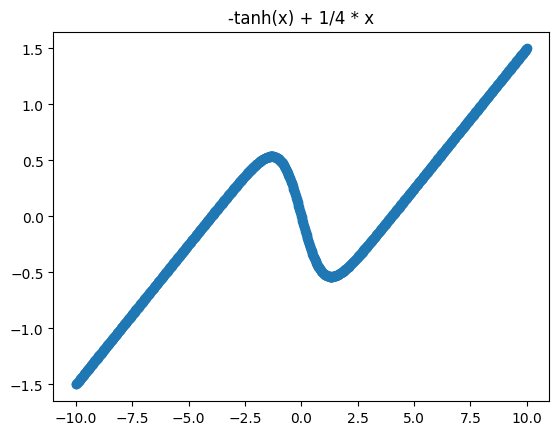

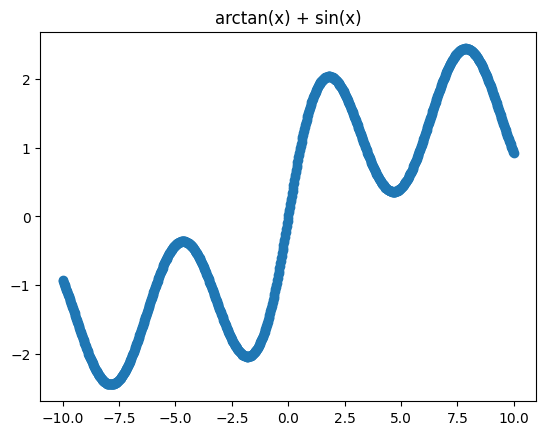

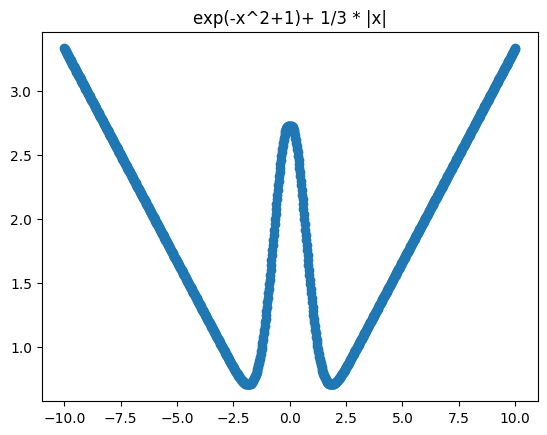

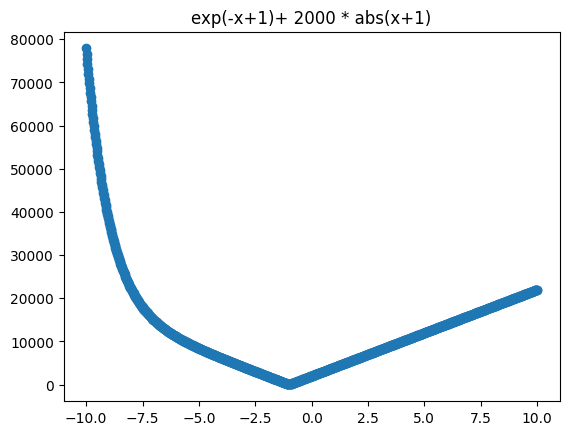

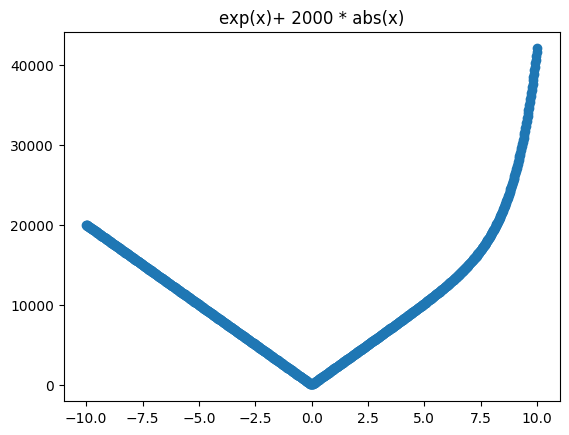

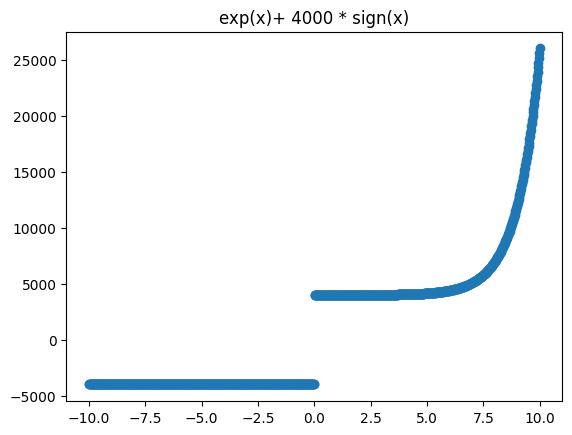

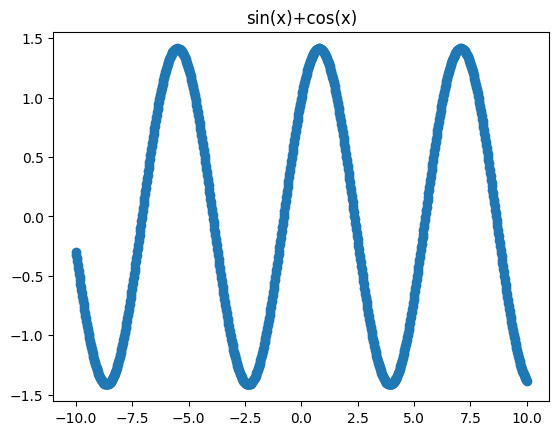

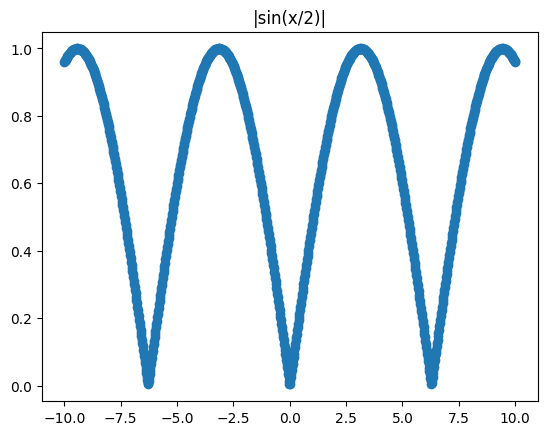

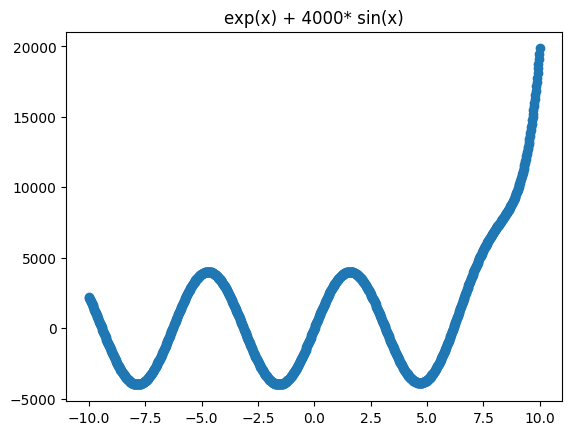

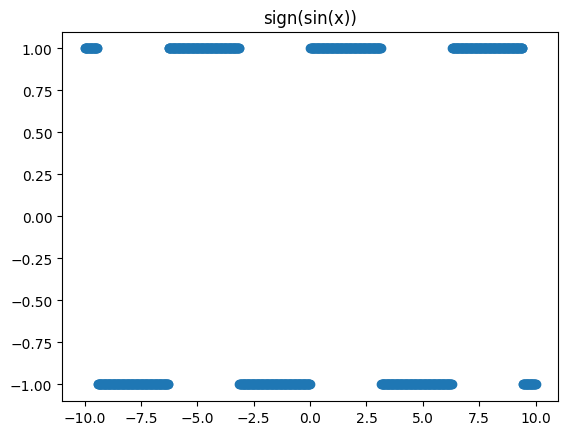

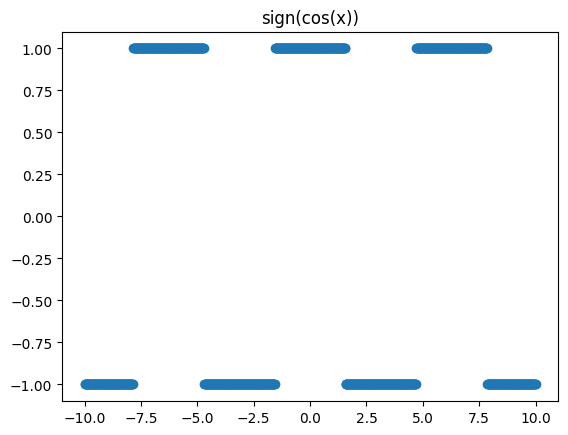

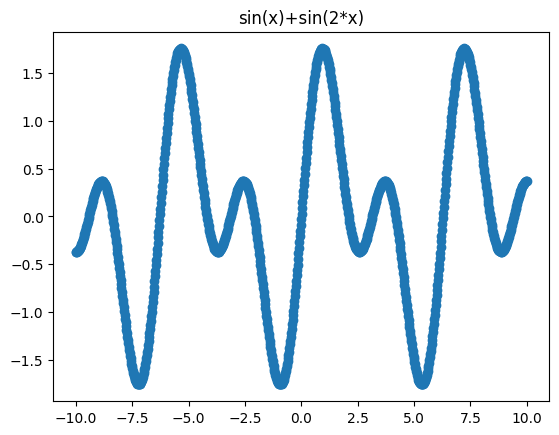

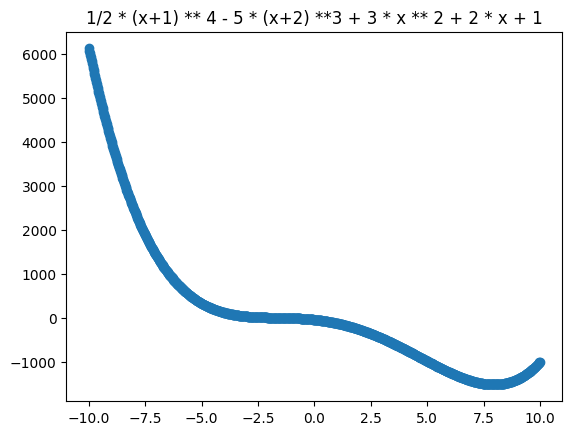

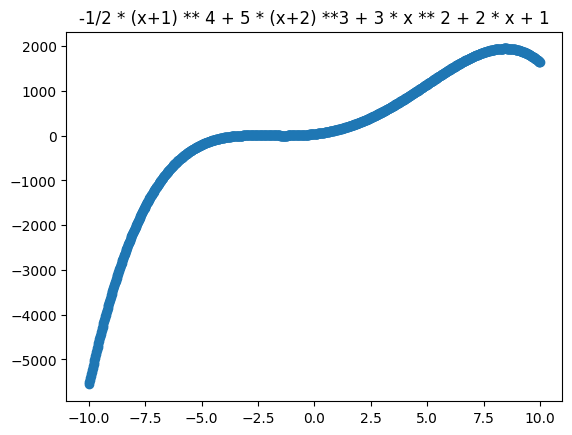

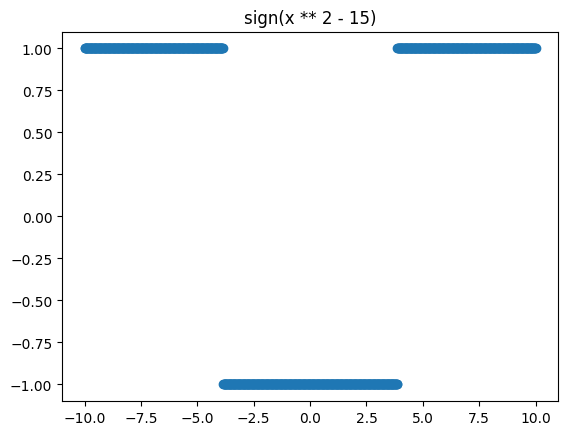

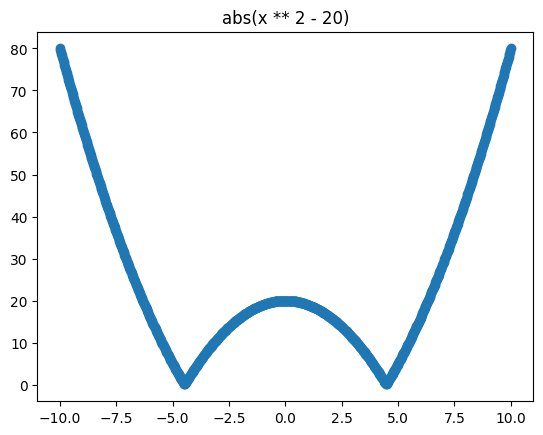

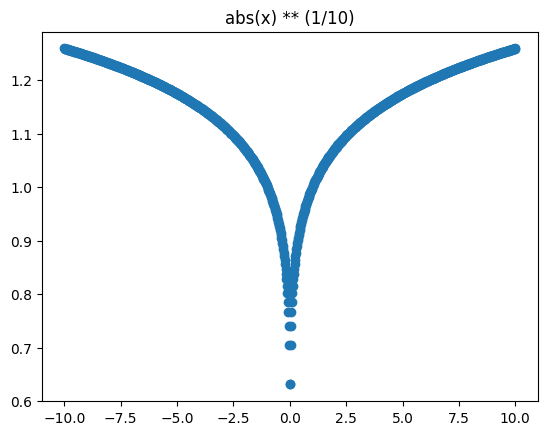

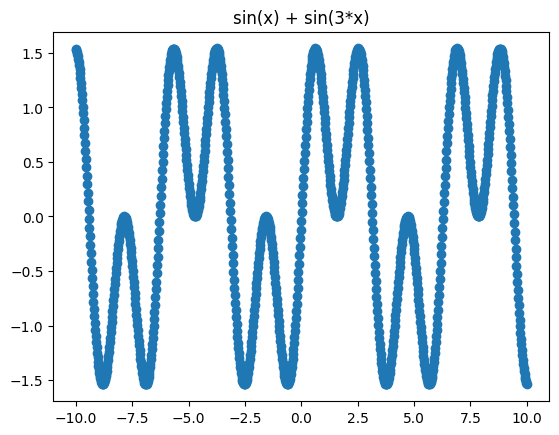

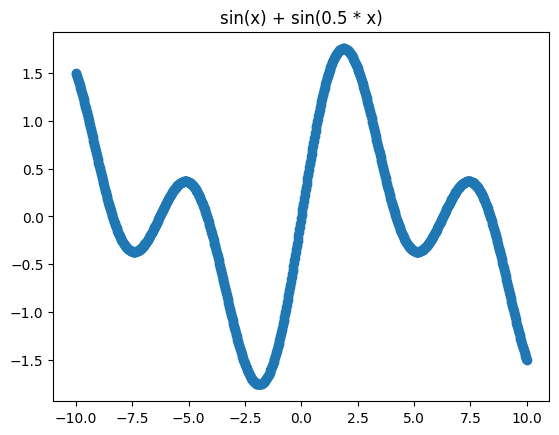

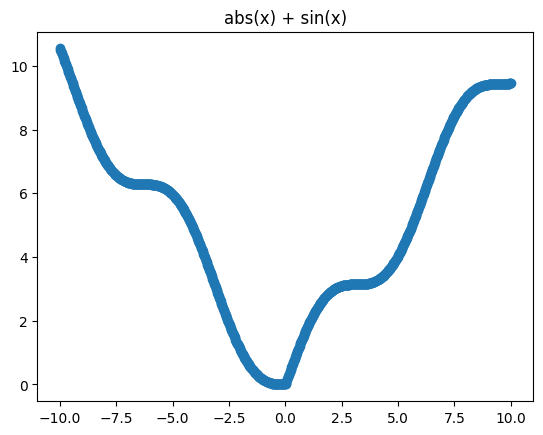

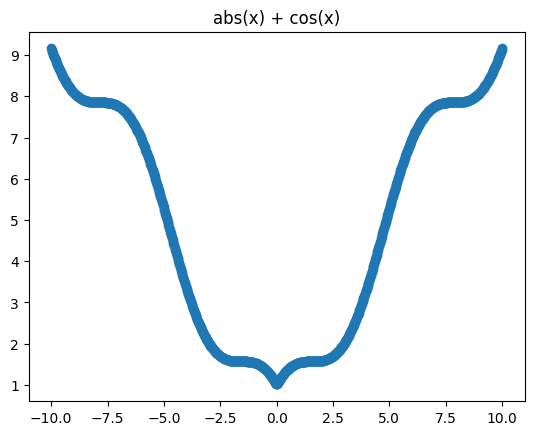

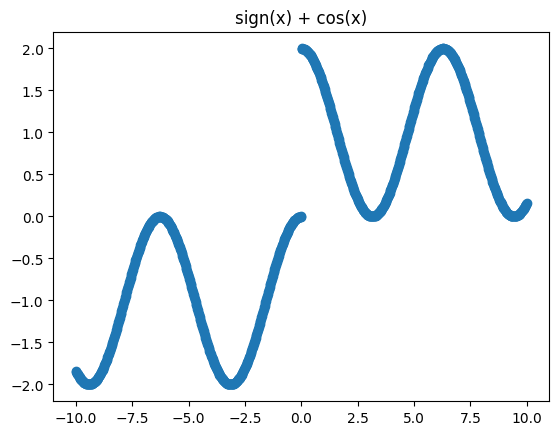

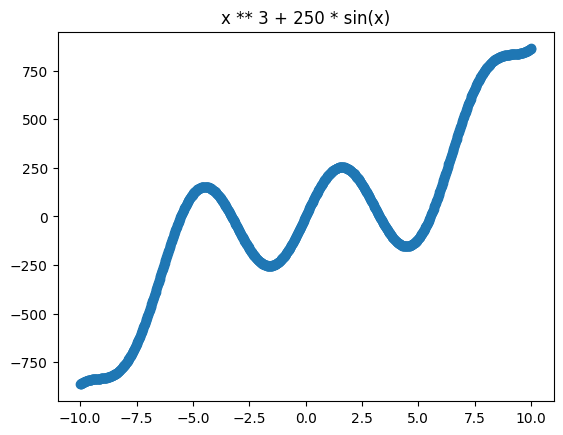

In [229]:
fbench_hard = [
    # composite functions
    (lambda x: -np.tanh(x) + 1/4 * x, '-tanh(x) + 1/4 * x'),
    (lambda x: np.arctan(x) + np.sin(x), 'arctan(x) + sin(x)'),
    (lambda x: np.exp(-x**2+1) + 1/3*np.abs(x), 'exp(-x^2+1)+ 1/3 * |x|'),
    (lambda x: np.exp(-x+1) + 2000* np.abs(x+1), 'exp(-x+1)+ 2000 * abs(x+1)'),
    (lambda x: np.exp(x) + 2000* np.abs(x), 'exp(x)+ 2000 * abs(x)'),
    (lambda x: np.exp(x) + 4000* np.sign(x), 'exp(x)+ 4000 * sign(x)'),
    (lambda x: np.sin(x) + np.cos(x), 'sin(x)+cos(x)'),
    (lambda x: np.abs(np.sin(x/2)), '|sin(x/2)|'),
    (lambda x: np.exp(x) + 4000* np.sin(x), 'exp(x) + 4000* sin(x)'),
    (lambda x: np.sign(np.sin(x)), 'sign(sin(x))'),
    (lambda x: np.sign(np.cos(x)), 'sign(cos(x))'),
    (lambda x: np.sin(x) + np.sin(2*x), 'sin(x)+sin(2*x)'),


    (lambda x: 1/2 * (x+1) ** 4 - 5 * (x+2) **3 + 3 * x ** 2 + 2 * x + 1, '1/2 * (x+1) ** 4 - 5 * (x+2) **3 + 3 * x ** 2 + 2 * x + 1'),
    (lambda x: -1/2 * (x+1) ** 4 + 5 * (x+2) **3 + 3 * x ** 2 + 2 * x + 1, '-1/2 * (x+1) ** 4 + 5 * (x+2) **3 + 3 * x ** 2 + 2 * x + 1'),
    (lambda x: np.sign(x ** 2 - 15), 'sign(x ** 2 - 15)'),
    (lambda x: np.abs(x ** 2 - 20), 'abs(x ** 2 - 20)'),
    (lambda x: np.abs(x) ** (1/10), 'abs(x) ** (1/10)'),
    (lambda x: np.sin(x) + np.sin(3*x), 'sin(x) + sin(3*x)'),
    (lambda x: np.sin(x) + np.sin(0.5 * x), 'sin(x) + sin(0.5 * x)'),
    (lambda x: np.abs(x) + np.sin(x), 'abs(x) + sin(x)'),
    (lambda x: np.abs(x) + np.cos(x), 'abs(x) + cos(x)'),
    (lambda x: np.sign(x) + np.cos(x), 'sign(x) + cos(x)'),
    (lambda x: x ** 3 + 250 * np.sin(x), 'x ** 3 + 250 * sin(x)'),
]

print(len(fbench_hard))

# for each, function draw 1000 samples from a uniform distribution and plot the function
function_points = []
x = np.linspace(-10, 10, 1000)
for f, n in fbench_hard:
    y = f(x)
    plt.scatter(x, y)
    plt.title(n)
    plt.show()

0


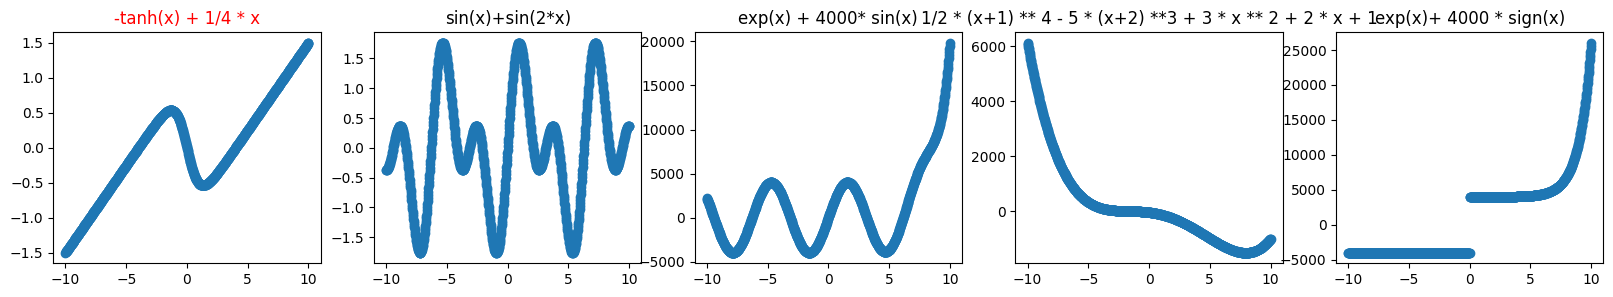

1


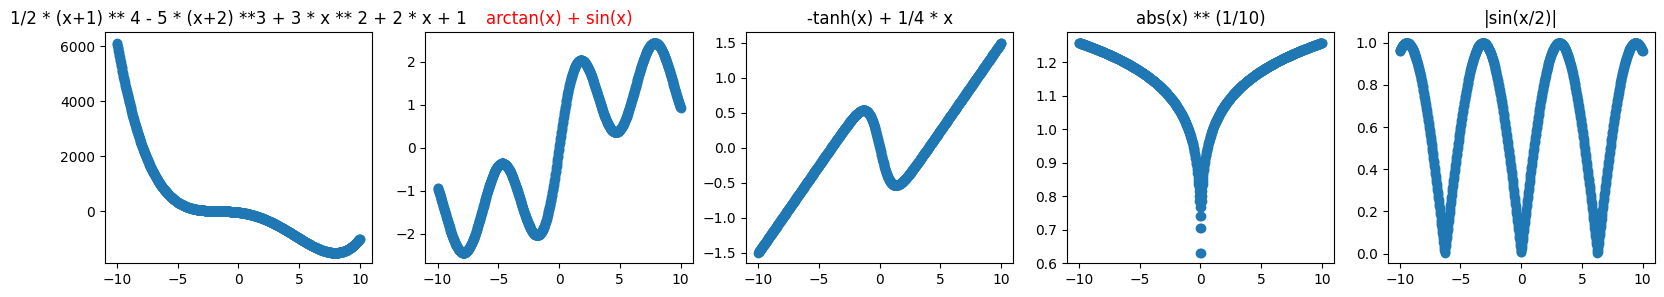

2


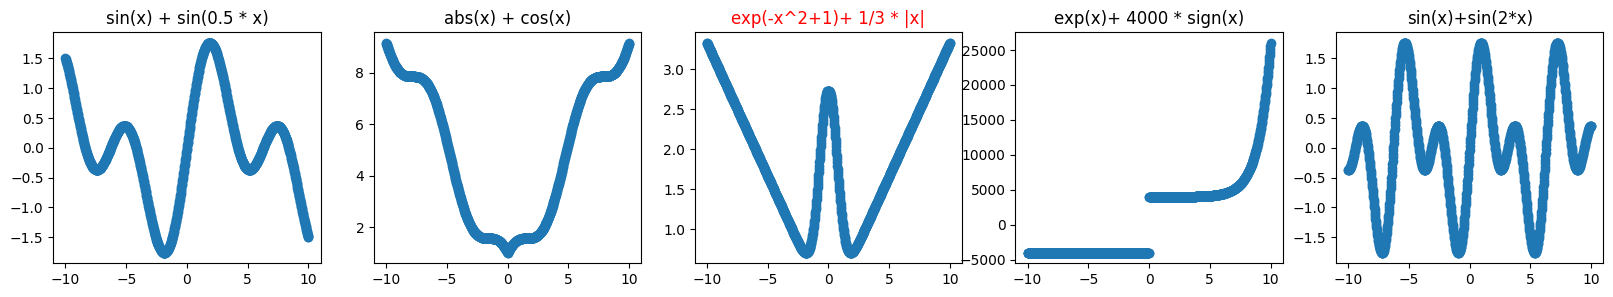

3


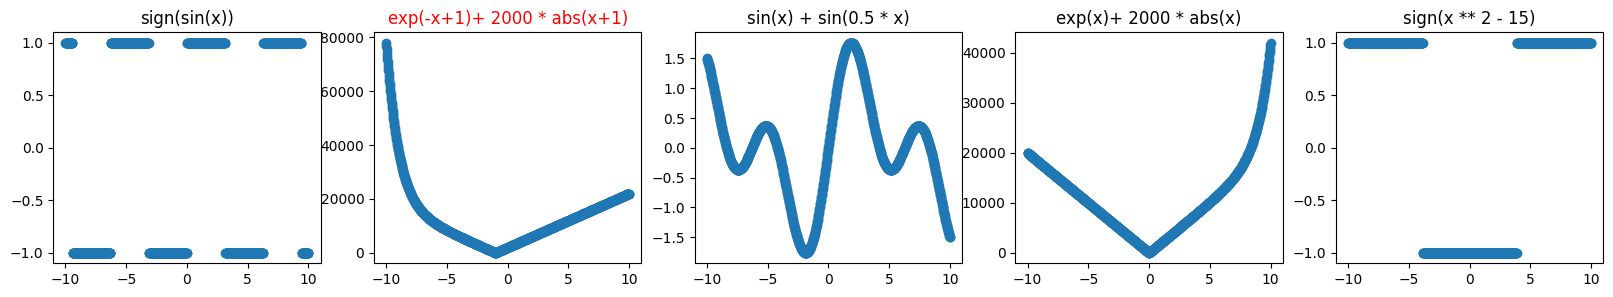

4


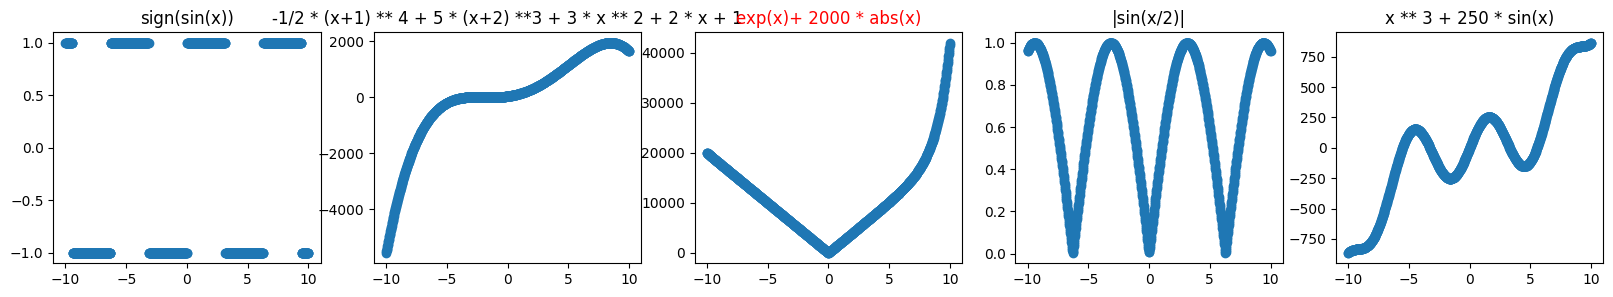

5


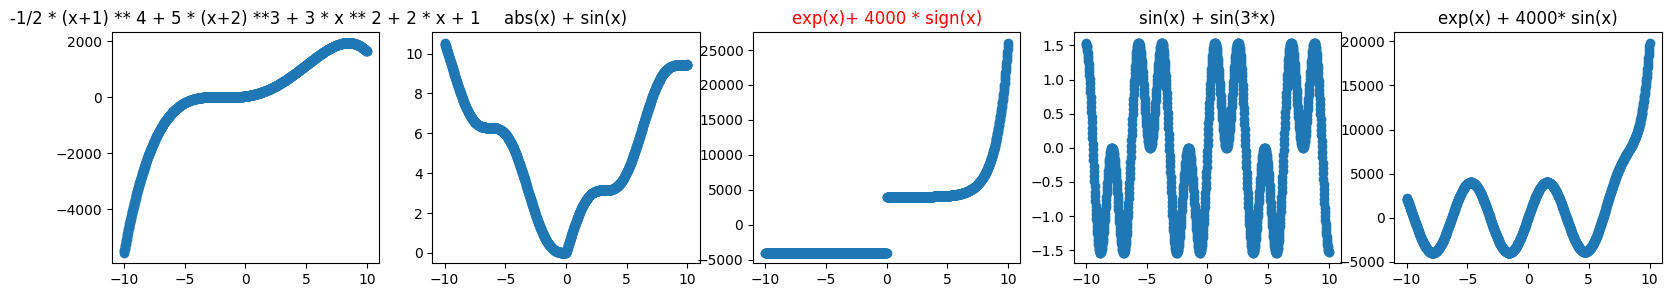

6


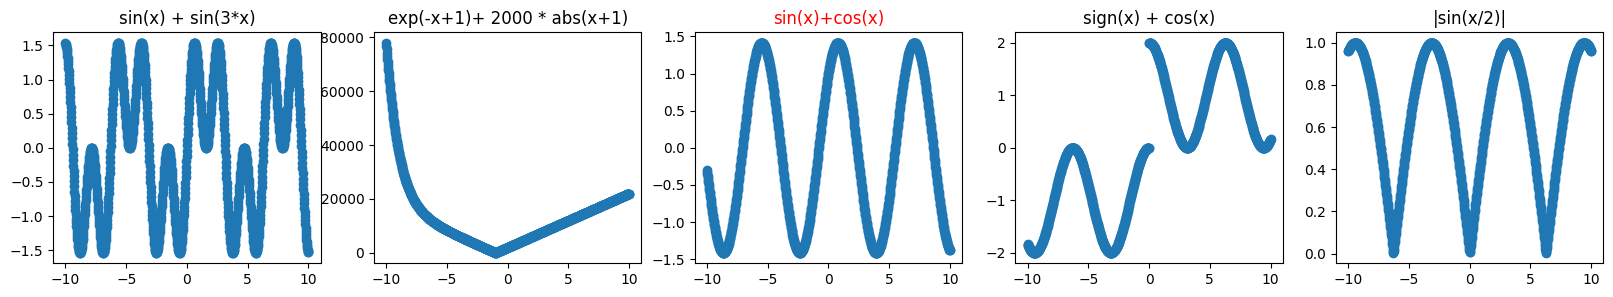

7


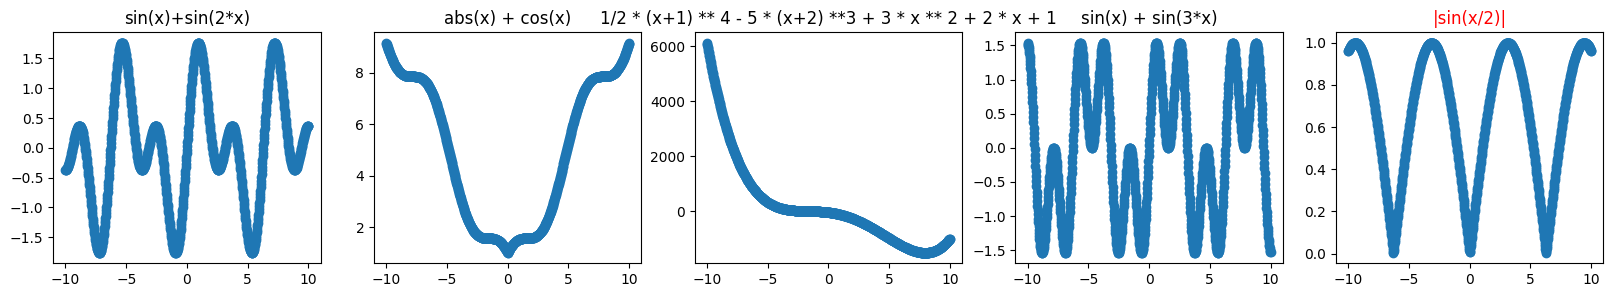

8


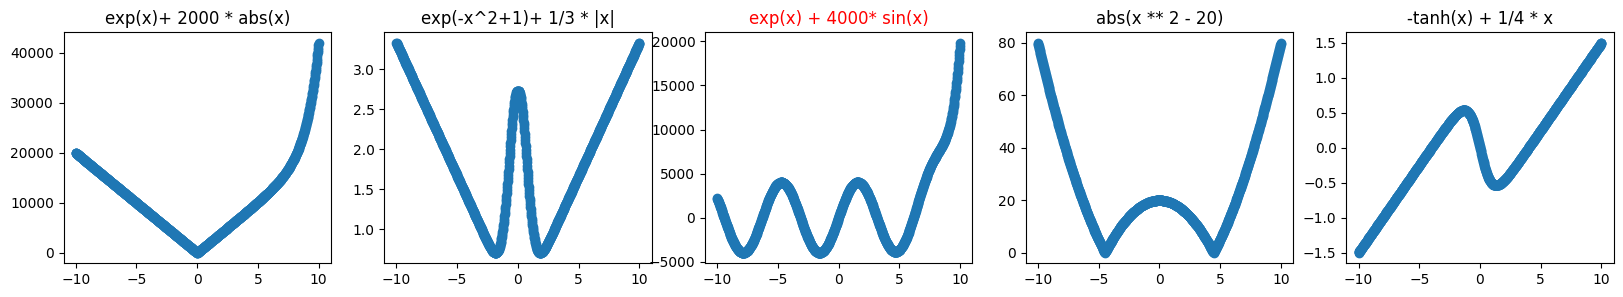

9


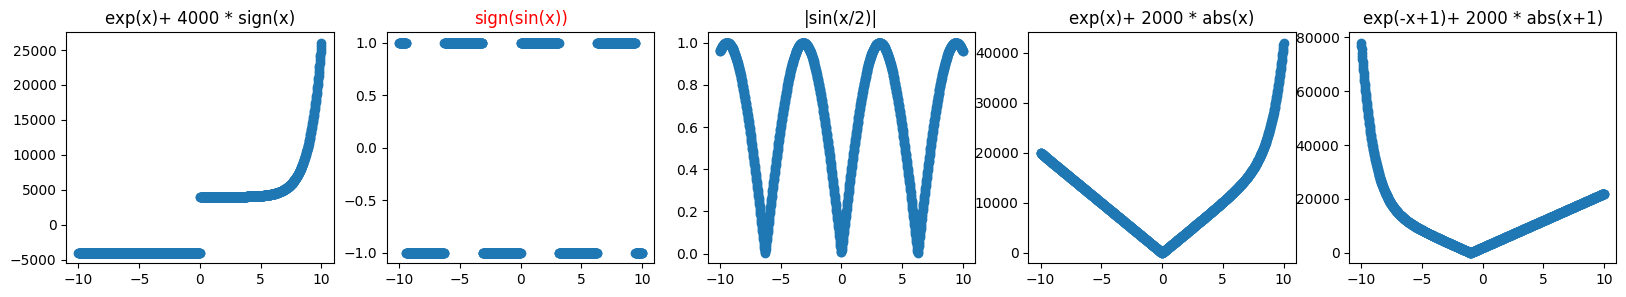

10


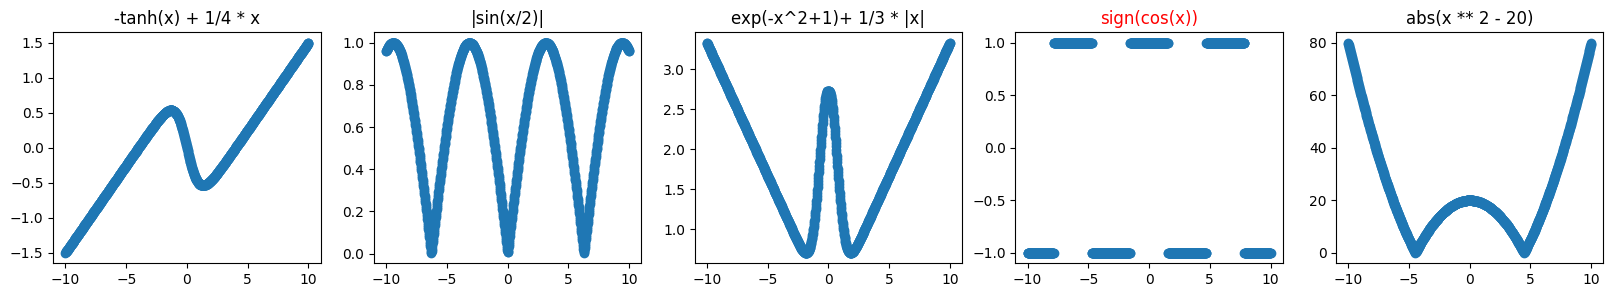

11


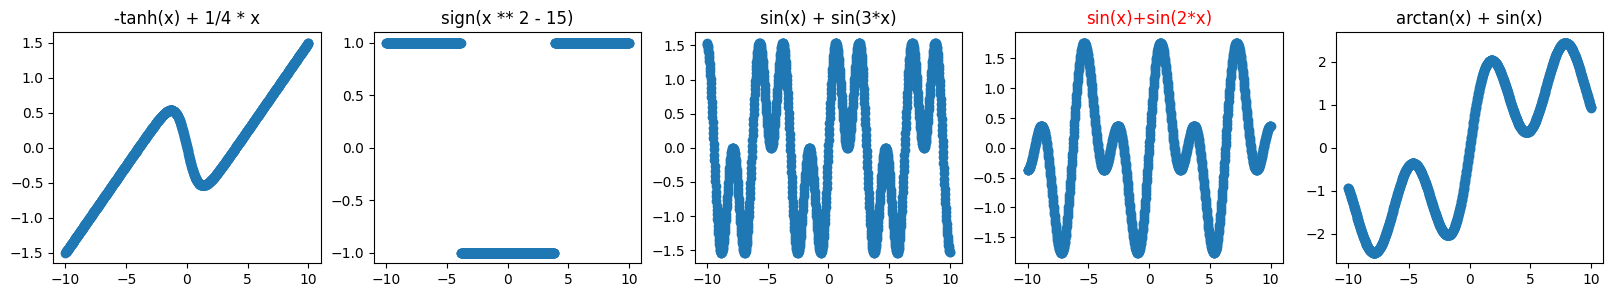

12


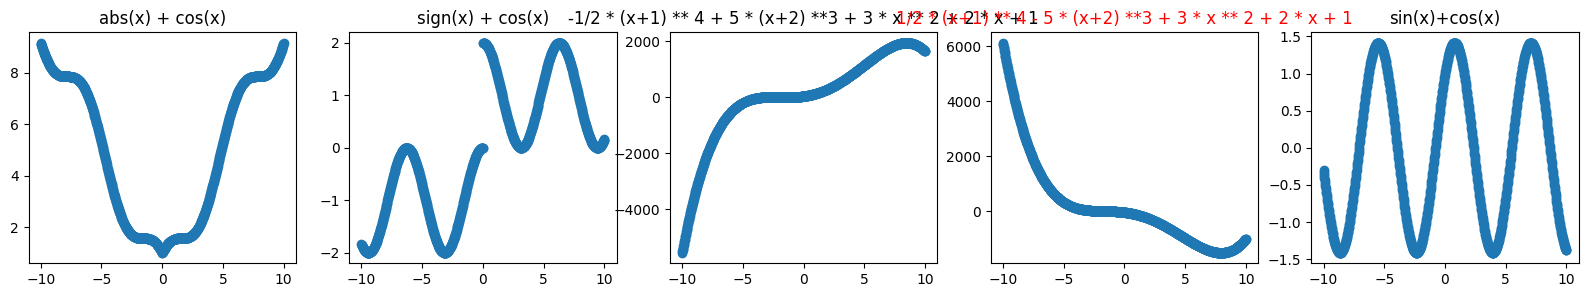

13


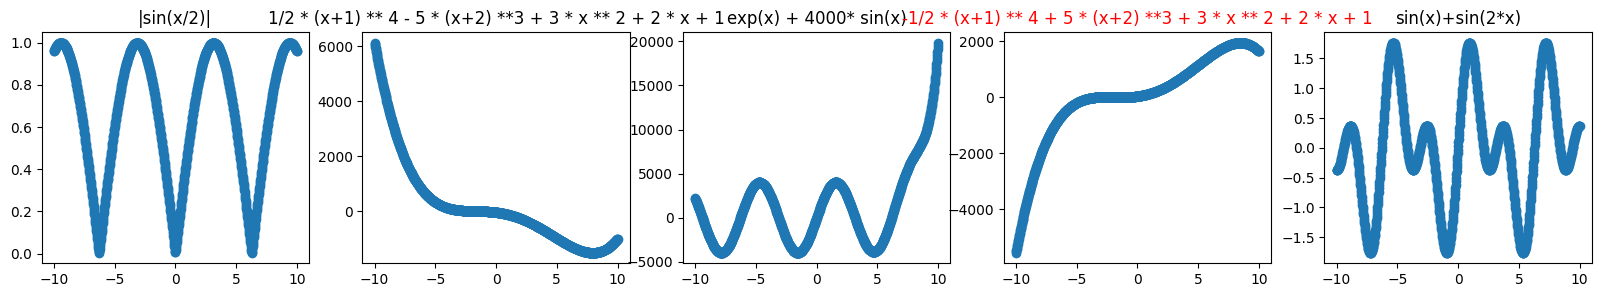

14


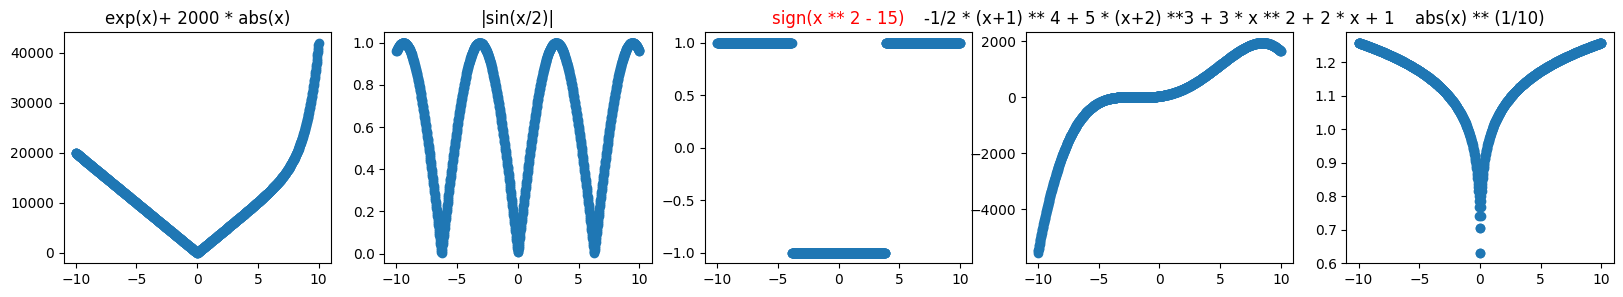

15


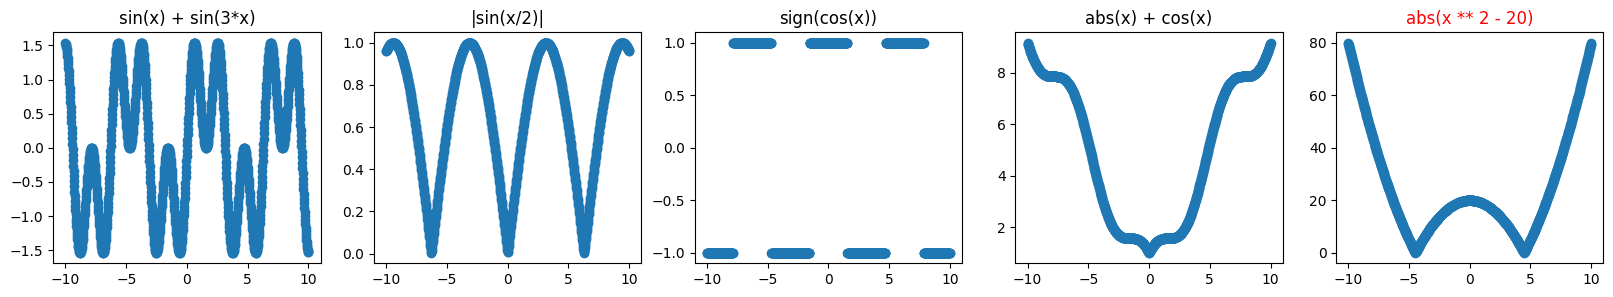

16


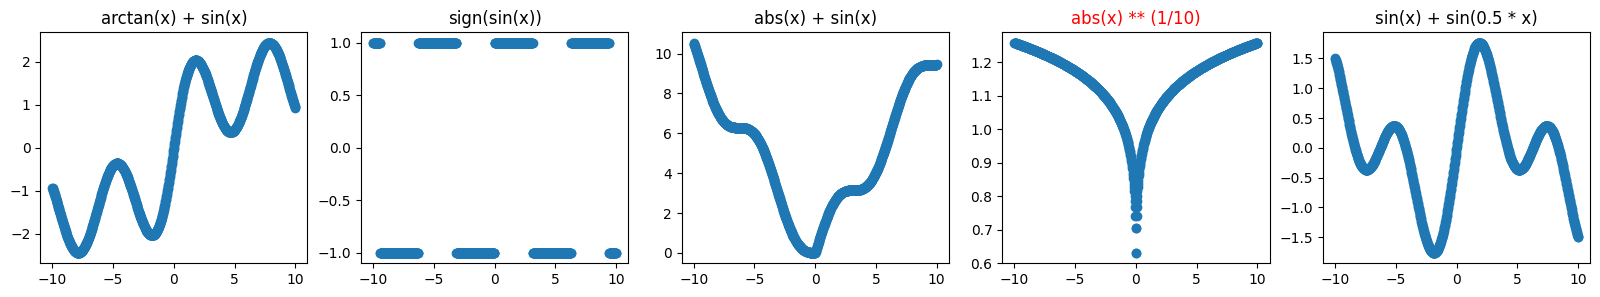

17


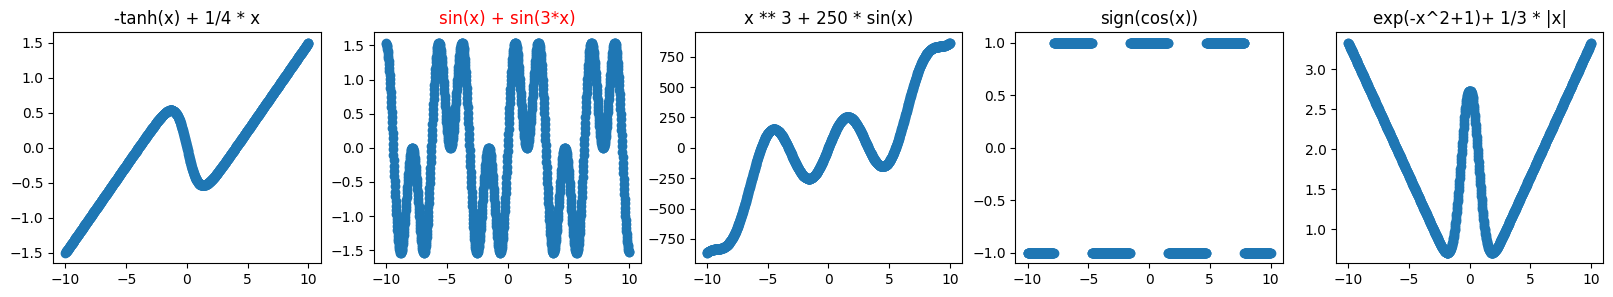

18


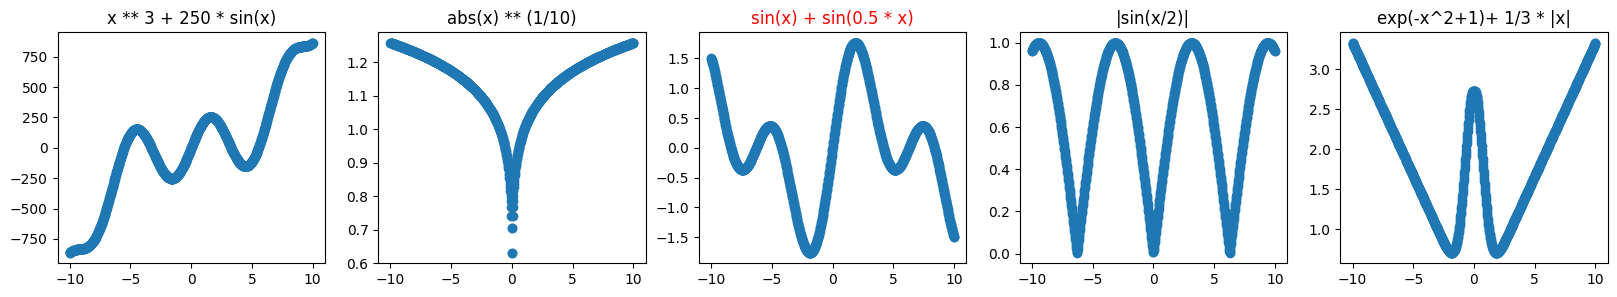

19


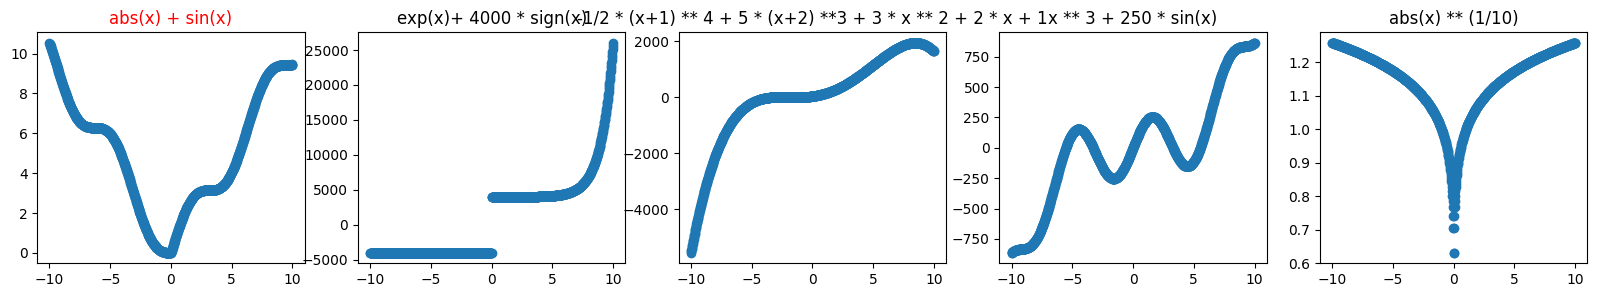

20


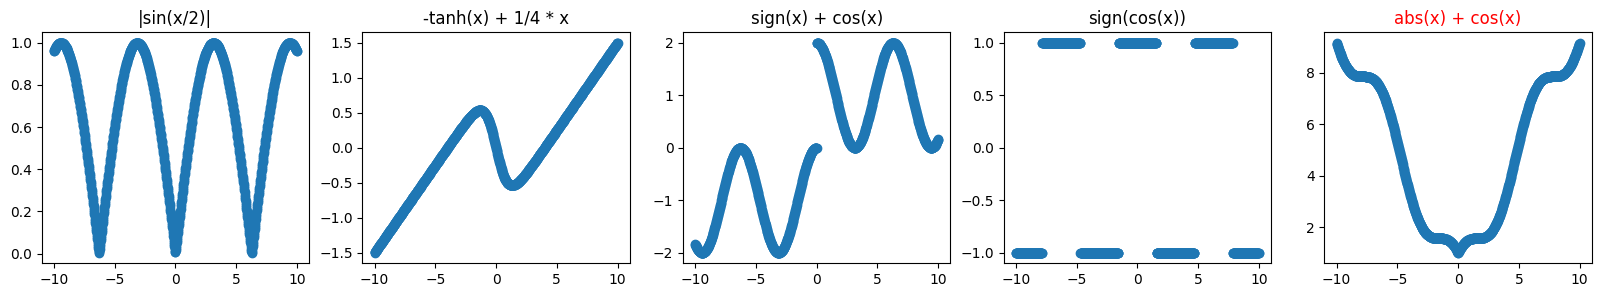

21


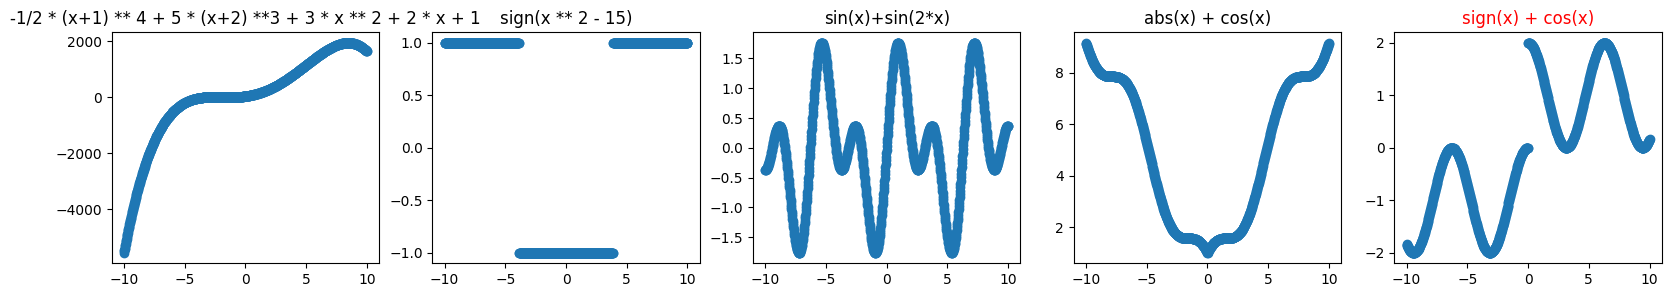

22


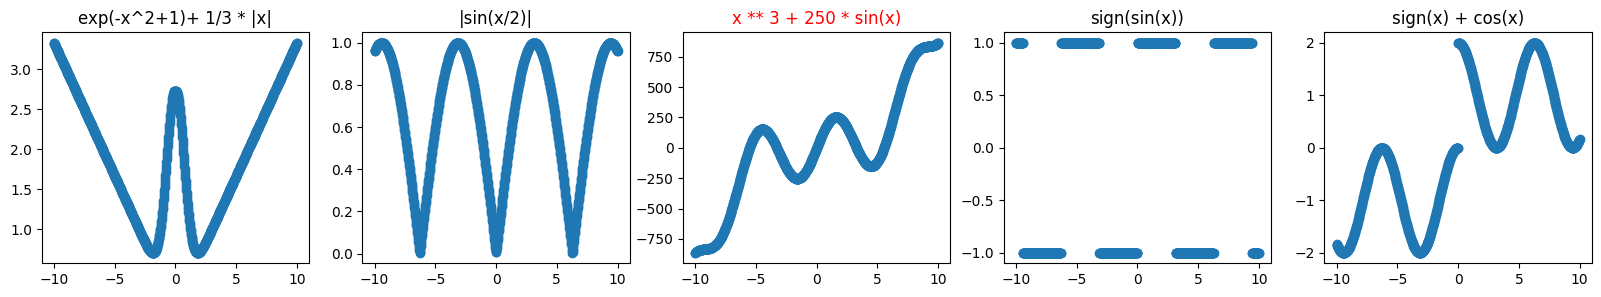

In [230]:
# first, randomly select the other multiple choice options
np.random.seed(1)
fbench_hard_questions = []
for idx, _ in enumerate(fbench_hard):
    mc_options = [idx]
    # select 4 more random functions
    for _ in range(4):
        random_idx = np.random.randint(0, len(fbench_hard))
        while random_idx in mc_options:
            random_idx = np.random.randint(0, len(fbench_hard))
        mc_options.append(random_idx)
    # shuffle options
    np.random.shuffle(mc_options)
    # store the options and the correct answer
    fbench_hard_questions.append((mc_options, idx))

# plot the 5 functions for each question
# make a 1x5 grid of plots
for idx, (options, correct) in enumerate(fbench_hard_questions):
    fig, axes = plt.subplots(1, 5, figsize=(20, 3))
    print(idx)
    for i, ax in enumerate(axes):
        f, n = fbench_hard[options[i]]
        y = f(x)
        ax.scatter(x, y)
        ax.set_title(n)
        # if it is the correct one, set the title color to red
        if options[i] == correct:
            ax.title.set_color('red')
    plt.show()

Target function: [1.         0.97979798 0.95959596 0.93939394 0.91919192 0.8989899
 0.87878788 0.85858586 0.83838384 0.81818182 0.7979798  0.77777778
 0.75757576 0.73737374 0.71717172 0.6969697  0.67676768 0.65656566
 0.63636364 0.61616162 0.5959596  0.57575758 0.55555556 0.53535354
 0.51515152 0.49494949 0.47474747 0.45454545 0.43434343 0.41414141
 0.39393939 0.37373737 0.35353535 0.33333333 0.31313131 0.29292929
 0.27272727 0.25252525 0.23232323 0.21212121 0.19191919 0.17171717
 0.15151515 0.13131313 0.11111111 0.09090909 0.07070707 0.05050505
 0.03030303 0.01010101 0.01010101 0.03030303 0.05050505 0.07070707
 0.09090909 0.11111111 0.13131313 0.15151515 0.17171717 0.19191919
 0.21212121 0.23232323 0.25252525 0.27272727 0.29292929 0.31313131
 0.33333333 0.35353535 0.37373737 0.39393939 0.41414141 0.43434343
 0.45454545 0.47474747 0.49494949 0.51515152 0.53535354 0.55555556
 0.57575758 0.5959596  0.61616162 0.63636364 0.65656566 0.67676768
 0.6969697  0.71717172 0.73737374 0.75757576 0

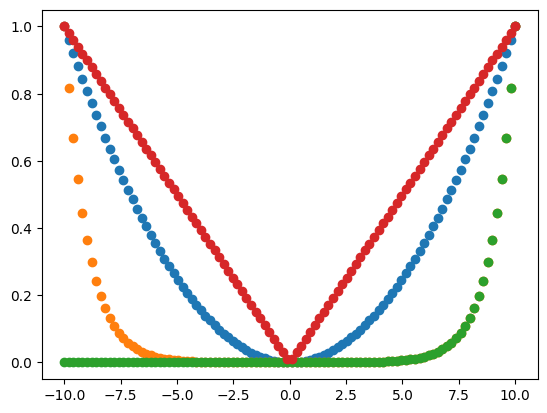

In [ ]:
from scipy.spatial.distance import euclidean

# divide function values by the maximum value to normalize them
function_points = [f / np.max(f) for f in function_points]

# Function to find the top 3 most similar functions to a given function
def find_top_3_similar_functions(target_function, functions):
    distances = []
    
    for i, func in enumerate(functions):
        if np.array_equal(func, target_function):
            continue
        distance = euclidean(target_function, func)
        distances.append((distance, i, func))
    
    # Sort by distance
    distances.sort(key=lambda x: x[0])
    
    # Get the top 3 most similar functions
    top_3 = distances[:3]
    return top_3


# Target function (e.g., the first function in the list)
target_function = function_points[8]

# Find the most similar function
top_3_similar = find_top_3_similar_functions(target_function, function_points)

print(f"Target function: {target_function}")
for rank, (dist, idx, func) in enumerate(top_3_similar, 1):
    print(f"{rank}. Most similar function (index {idx}) with distance {dist}: {func}")

# plot the top 3 most similar functions
for rank, (_, _, func) in enumerate(top_3_similar, 1):
    plt.scatter(x, func, label=f"Rank {rank}")

# plot the target function
plt.scatter(x, target_function, label="Target function")

In [149]:
fbench = fbench_hard
fbench_questions = fbench_hard_questions

# Fit EBMs and convert functions to text

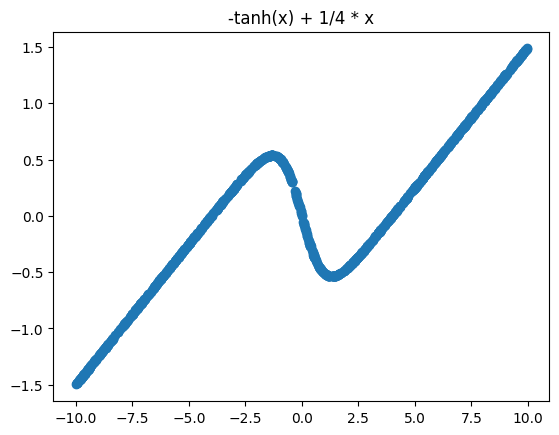

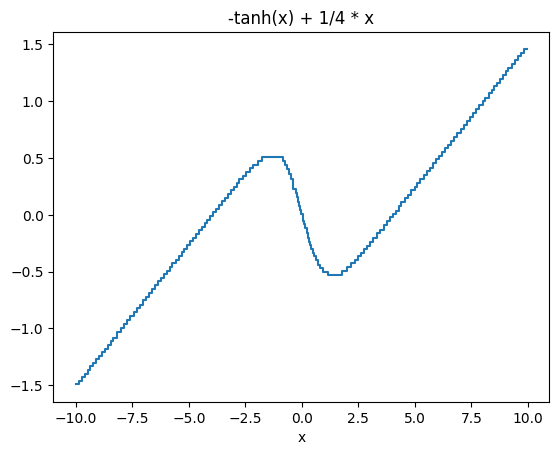

INFO: The graph of feature x was simplified by 2.2%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: x
Feature Type: continuous
Means: {"(-9.99, -9.6)": -1.492, "(-9.6, -9.23)": -1.398, "(-9.23, -8.97)": -1.305, "(-8.97, -8.59)": -1.239, "(-8.59, -8.19)": -1.145, "(-8.19, -7.84)": -1.033, "(-7.84, -7.58)": -0.96, "(-7.58, -7.29)": -0.893, "(-7.29, -7.04)": -0.822, "(-7.04, -6.62)": -0.754, "(-6.62, -6.34)": -0.651, "(-6.34, -5.98)": -0.582, "(-5.98, -5.58)": -0.49, "(-5.58, -5.21)": -0.394, "(-5.21, -4.83)": -0.299, "(-4.83, -4.56)": -0.203, "(-4.56, -4.19)": -0.135, "(-4.19, -3.78)": -0.042, "(-3.78, -3.41)": 0.054, "(-3.41, -3.12)": 0.149, "(-3.12, -2.78)": 0.218, "(-2.78, -2.32)": 0.311, "(-2.32, -1.76)": 0.409, "(-1.76, -0.73)": 0.506, "(-0.73, -0.56)": 0.438, "(-0.56, -0.37)": 0.358, "(-0.37, -0.23)": 0.227, "(-0.23, -0.11)": 0.154, "(-0.11, -0.02)": 0.076, "(-0.02, 0.1)": 0.

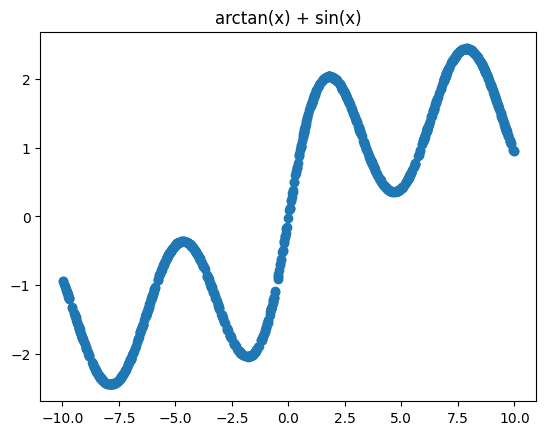

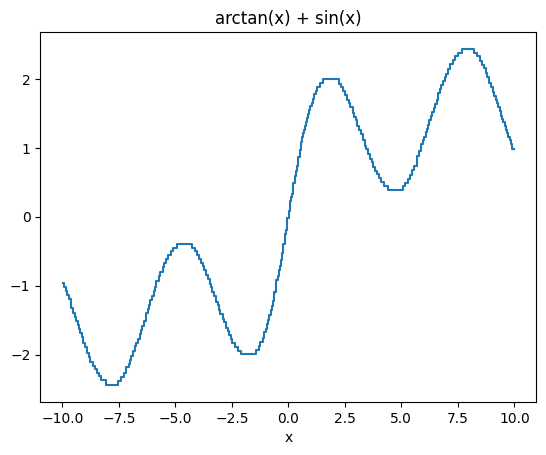

INFO: The graph of feature x was simplified by 3.7%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: x
Feature Type: continuous
Means: {"(-9.98, -9.72)": -0.957, "(-9.72, -9.52)": -1.187, "(-9.52, -9.27)": -1.397, "(-9.27, -9.07)": -1.626, "(-9.07, -8.83)": -1.828, "(-8.83, -8.58)": -2.028, "(-8.58, -8.06)": -2.209, "(-8.06, -7.17)": -2.434, "(-7.17, -6.86)": -2.184, "(-6.86, -6.59)": -1.949, "(-6.59, -6.4)": -1.696, "(-6.4, -6.17)": -1.508, "(-6.17, -5.97)": -1.276, "(-5.97, -5.74)": -1.079, "(-5.74, -5.5)": -0.861, "(-5.5, -5.1)": -0.673, "(-5.1, -3.87)": -0.449, "(-3.87, -3.56)": -0.666, "(-3.56, -3.36)": -0.896, "(-3.36, -3.12)": -1.09, "(-3.12, -2.91)": -1.287, "(-2.91, -2.69)": -1.481, "(-2.69, -2.35)": -1.662, "(-2.35, -1.07)": -1.891, "(-1.07, -0.9)": -1.677, "(-0.9, -0.74)": -1.496, "(-0.74, -0.62)": -1.297, "(-0.62, -0.46)": -1.097, "(-0.46, -0.34)": -0.862, "(-0.34, -0.

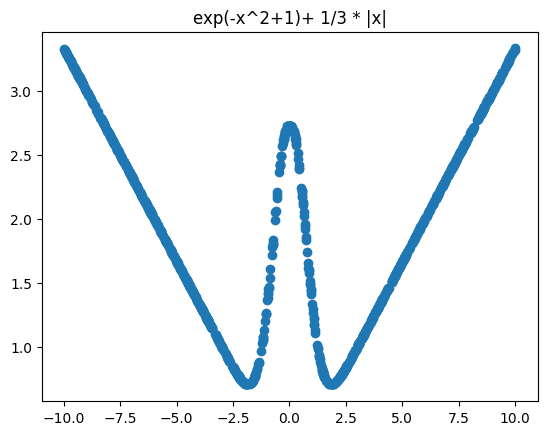

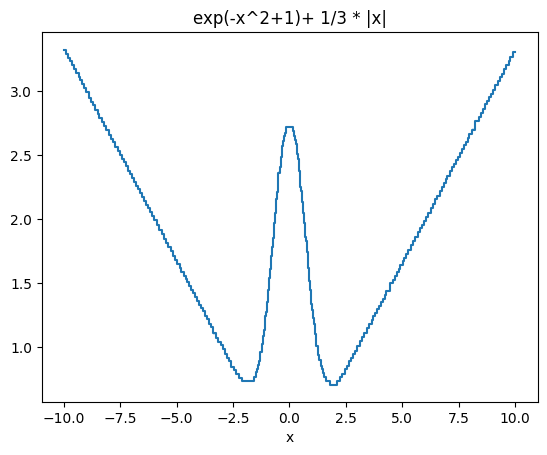

INFO: The graph of feature x was simplified by 4.6%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: x
Feature Type: continuous
Means: {"(-9.98, -9.54)": 3.323, "(-9.54, -9.1)": 3.175, "(-9.1, -8.68)": 3.024, "(-8.68, -8.3)": 2.892, "(-8.3, -7.89)": 2.763, "(-7.89, -7.53)": 2.631, "(-7.53, -7.16)": 2.501, "(-7.16, -6.72)": 2.379, "(-6.72, -6.35)": 2.234, "(-6.35, -5.88)": 2.113, "(-5.88, -5.46)": 1.955, "(-5.46, -5.06)": 1.817, "(-5.06, -4.6)": 1.679, "(-4.6, -4.2)": 1.534, "(-4.2, -3.76)": 1.396, "(-3.76, -3.37)": 1.248, "(-3.37, -2.96)": 1.108, "(-2.96, -2.58)": 0.983, "(-2.58, -1.24)": 0.848, "(-1.24, -1.11)": 1.026, "(-1.11, -1.01)": 1.205, "(-1.01, -0.92)": 1.352, "(-0.92, -0.86)": 1.479, "(-0.86, -0.77)": 1.611, "(-0.77, -0.69)": 1.781, "(-0.69, -0.59)": 1.975, "(-0.59, -0.5)": 2.162, "(-0.5, -0.39)": 2.365, "(-0.39, -0.28)": 2.488, "(-0.28, 0.37)": 2.614, "(0.37, 0.48)": 2.

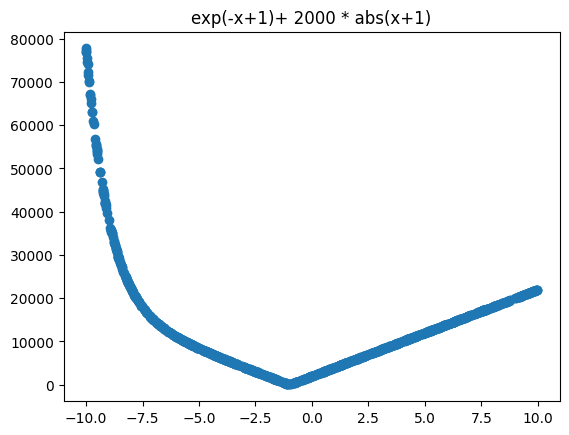

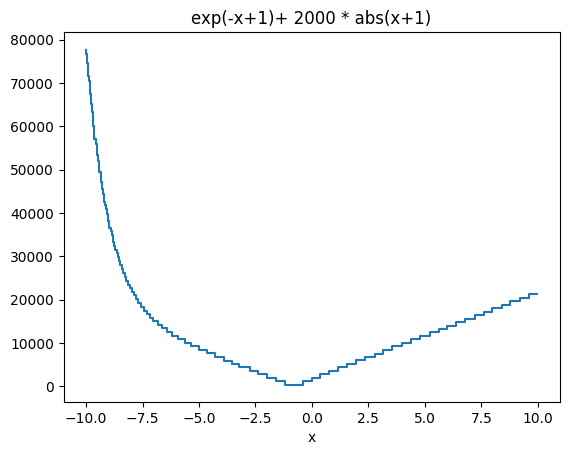

INFO: The graph of feature x was simplified by 1.3%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: x
Feature Type: continuous
Means: {"(-10.0, -9.97)": 77629.6, "(-9.97, -9.92)": 75483.3, "(-9.92, -9.88)": 72339.5, "(-9.88, -9.84)": 70397.0, "(-9.84, -9.8)": 67393.0, "(-9.8, -9.75)": 66047.6, "(-9.75, -9.71)": 63231.7, "(-9.71, -9.63)": 61069.8, "(-9.63, -9.58)": 57163.5, "(-9.58, -9.54)": 55787.7, "(-9.54, -9.51)": 54497.2, "(-9.51, -9.49)": 53361.9, "(-9.49, -9.43)": 52076.6, "(-9.43, -9.35)": 49437.3, "(-9.35, -9.29)": 47029.3, "(-9.29, -9.24)": 45407.7, "(-9.24, -9.19)": 44261.8, "(-9.19, -9.12)": 42586.3, "(-9.12, -9.09)": 40835.6, "(-9.09, -9.04)": 39667.4, "(-9.04, -8.96)": 38096.4, "(-8.96, -8.87)": 36561.8, "(-8.87, -8.81)": 34852.9, "(-8.81, -8.71)": 33372.7, "(-8.71, -8.59)": 31554.1, "(-8.59, -8.49)": 29831.5, "(-8.49, -8.37)": 28079.5, "(-8.37, -8.21)": 26157.3, "(-

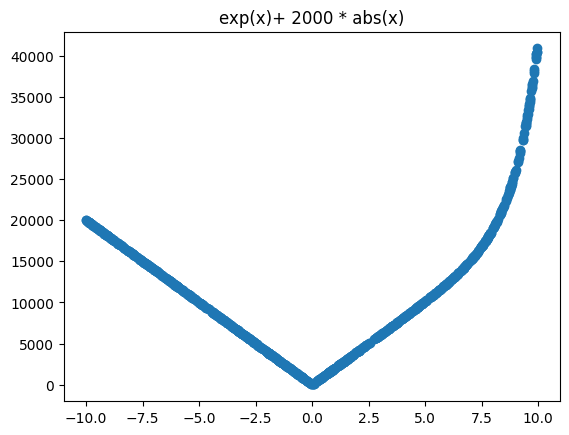

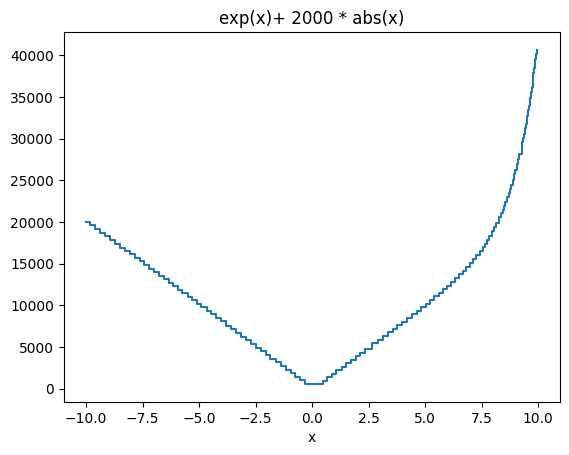

INFO: The graph of feature x was simplified by 2.2%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: x
Feature Type: continuous
Means: {"(-10.0, -9.38)": 20007.1, "(-9.38, -8.72)": 18721.4, "(-8.72, -8.06)": 17371.5, "(-8.06, -7.42)": 16101.2, "(-7.42, -6.79)": 14835.2, "(-6.79, -6.15)": 13565.8, "(-6.15, -5.49)": 12268.5, "(-5.49, -4.9)": 11043.4, "(-4.9, -4.26)": 9762.5, "(-4.26, -3.82)": 8491.6, "(-3.82, -3.35)": 7576.4, "(-3.35, -2.71)": 6677.2, "(-2.71, -2.04)": 5378.3, "(-2.04, -1.6)": 4074.3, "(-1.6, -1.15)": 3180.3, "(-1.15, -0.53)": 2283.4, "(-0.53, 1.08)": 1034.9, "(1.08, 1.72)": 2231.9, "(1.72, 2.36)": 3472.0, "(2.36, 2.92)": 4768.9, "(2.92, 3.56)": 5881.7, "(3.56, 4.2)": 7179.7, "(4.2, 4.81)": 8490.1, "(4.81, 5.41)": 9786.6, "(5.41, 5.96)": 11096.8, "(5.96, 6.49)": 12349.7, "(6.49, 6.81)": 13701.8, "(6.81, 7.12)": 14599.6, "(7.12, 7.41)": 15507.3, "(7.41, 7.76)": 16565

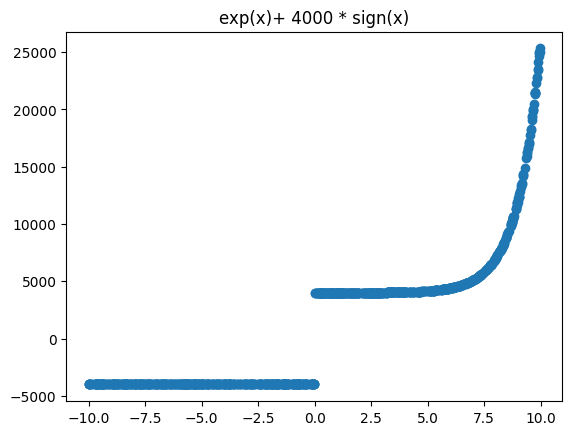

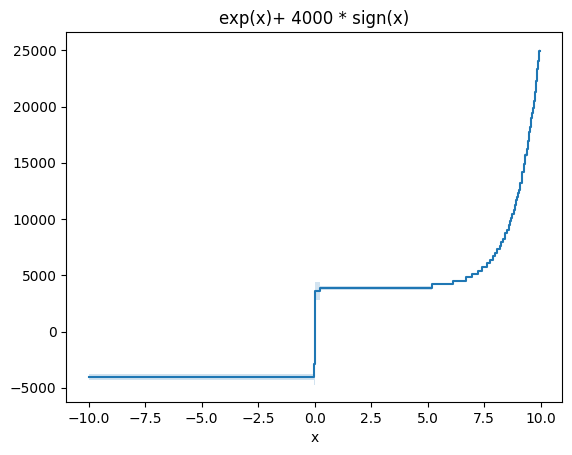

This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: x
Feature Type: continuous
Means: {"(-9.99, -0.02)": -4033.1, "(-0.02, -0.01)": -3463.5, "(-0.01, 0.0)": -2878.5, "(0.0, 0.01)": 3168.7, "(0.01, 0.24)": 3601.3, "(0.24, 5.2)": 3902.3, "(5.2, 6.14)": 4194.4, "(6.14, 6.69)": 4486.9, "(6.69, 6.95)": 4801.1, "(6.95, 7.25)": 5095.5, "(7.25, 7.42)": 5394.2, "(7.42, 7.61)": 5741.0, "(7.61, 7.75)": 6060.0, "(7.75, 7.88)": 6370.5, "(7.88, 8.01)": 6719.7, "(8.01, 8.09)": 7018.4, "(8.09, 8.19)": 7318.2, "(8.19, 8.27)": 7633.6, "(8.27, 8.34)": 7931.9, "(8.34, 8.43)": 8243.3, "(8.43, 8.51)": 8715.0, "(8.51, 8.59)": 9025.6, "(8.59, 8.63)": 9455.6, "(8.63, 8.71)": 9781.1, "(8.71, 8.76)": 10095.1, "(8.76, 8.81)": 10402.4, "(8.81, 8.85)": 10769.3, "(8.85, 8.93)": 11205.3, "(8.93, 8.98)": 11657.2, "(8.98, 9.02)": 11978.3, "(9.02, 9.04)": 12274.0, "(9.04, 9.11)": 12620.0, "(9.11, 9.16)": 13195.6, "(9.1

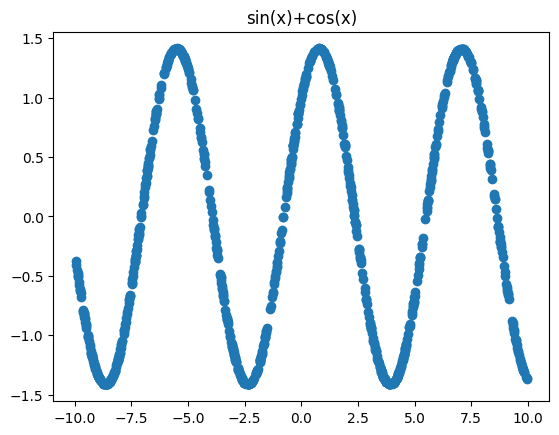

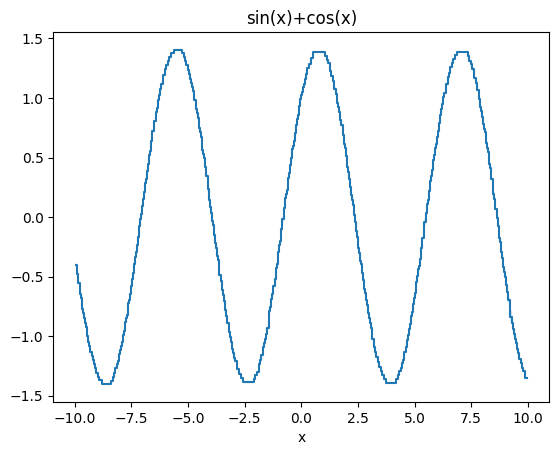

INFO: The graph of feature x was simplified by 8.7%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: x
Feature Type: continuous
Means: {"(-9.94, -9.72)": -0.404, "(-9.72, -9.46)": -0.682, "(-9.46, -9.11)": -0.997, "(-9.11, -7.87)": -1.27, "(-7.87, -7.62)": -0.989, "(-7.62, -7.42)": -0.725, "(-7.42, -7.22)": -0.469, "(-7.22, -7.02)": -0.195, "(-7.02, -6.81)": 0.096, "(-6.81, -6.62)": 0.383, "(-6.62, -6.39)": 0.639, "(-6.39, -6.11)": 0.885, "(-6.11, -4.66)": 1.193, "(-4.66, -4.4)": 0.91, "(-4.4, -4.2)": 0.622, "(-4.2, -4.01)": 0.348, "(-4.01, -3.79)": 0.086, "(-3.79, -3.63)": -0.216, "(-3.63, -3.37)": -0.486, "(-3.37, -3.11)": -0.783, "(-3.11, -2.74)": -1.051, "(-2.74, -1.64)": -1.322, "(-1.64, -1.44)": -1.061, "(-1.44, -1.17)": -0.789, "(-1.17, -0.97)": -0.519, "(-0.97, -0.76)": -0.237, "(-0.76, -0.53)": 0.08, "(-0.53, -0.32)": 0.373, "(-0.32, -0.11)": 0.637, "(-0.11, 0.17)": 0.898

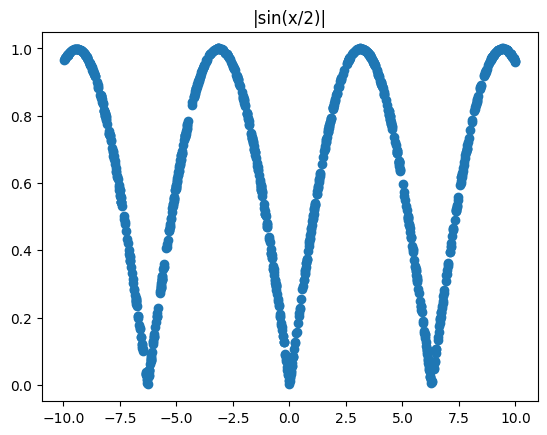

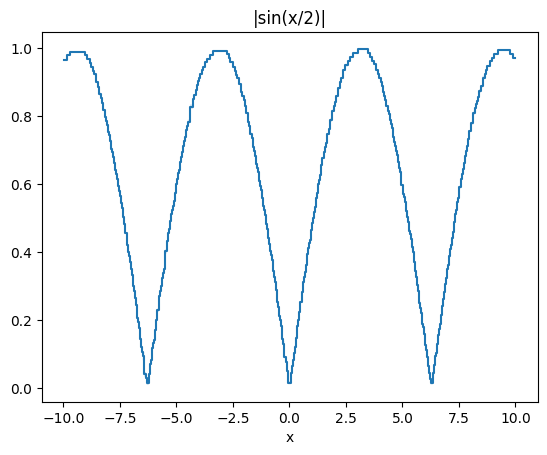

INFO: The graph of feature x was simplified by 8.7%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: x
Feature Type: continuous
Means: {"(-9.96, -8.41)": 0.9674, "(-8.41, -8.08)": 0.8654, "(-8.08, -7.8)": 0.7739, "(-7.8, -7.58)": 0.682, "(-7.58, -7.37)": 0.5948, "(-7.37, -7.13)": 0.5034, "(-7.13, -6.94)": 0.4023, "(-6.94, -6.73)": 0.3139, "(-6.73, -6.51)": 0.207, "(-6.51, -6.32)": 0.1087, "(-6.32, -6.07)": 0.0155, "(-6.07, -5.86)": 0.1195, "(-5.86, -5.68)": 0.2152, "(-5.68, -5.5)": 0.3026, "(-5.5, -5.27)": 0.4029, "(-5.27, -5.03)": 0.4919, "(-5.03, -4.8)": 0.5859, "(-4.8, -4.53)": 0.681, "(-4.53, -4.21)": 0.7715, "(-4.21, -3.74)": 0.8639, "(-3.74, -2.15)": 0.9597, "(-2.15, -1.82)": 0.8725, "(-1.82, -1.55)": 0.7845, "(-1.55, -1.33)": 0.6985, "(-1.33, -1.12)": 0.6107, "(-1.12, -0.89)": 0.5251, "(-0.89, -0.68)": 0.4241, "(-0.68, -0.49)": 0.3266, "(-0.49, -0.31)": 0.2389, "(-0.31, -0.

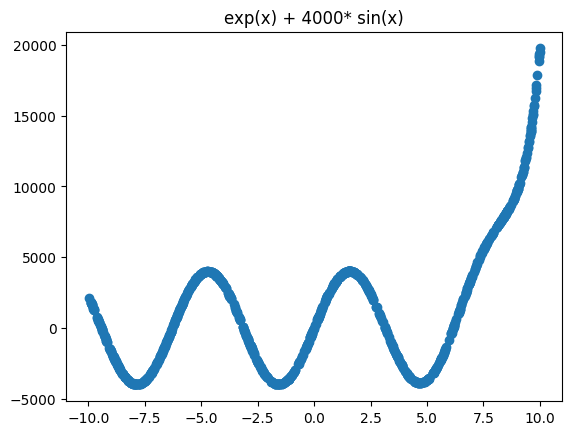

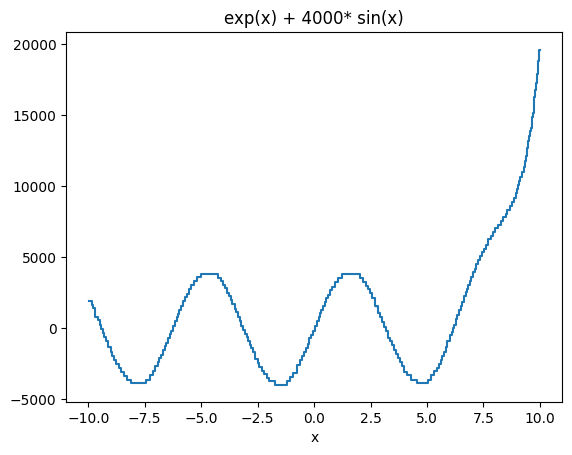

INFO: The graph of feature x was simplified by 3.6%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: x
Feature Type: continuous
Means: {"(-9.97, -9.68)": 1911.5, "(-9.68, -9.43)": 813.0, "(-9.43, -9.21)": -41.1, "(-9.21, -8.93)": -893.6, "(-8.93, -8.65)": -1956.4, "(-8.65, -8.11)": -2806.5, "(-8.11, -7.14)": -3878.5, "(-7.14, -6.85)": -3002.8, "(-6.85, -6.56)": -2094.7, "(-6.56, -6.34)": -1029.5, "(-6.34, -6.09)": -154.8, "(-6.09, -5.8)": 794.7, "(-5.8, -5.54)": 1909.3, "(-5.54, -5.01)": 2771.0, "(-5.01, -3.93)": 3822.1, "(-3.93, -3.62)": 2815.5, "(-3.62, -3.37)": 1688.0, "(-3.37, -3.13)": 810.0, "(-3.13, -2.86)": -104.0, "(-2.86, -2.61)": -1178.3, "(-2.61, -2.21)": -2154.9, "(-2.21, -0.62)": -3240.3, "(-0.62, -0.29)": -2206.4, "(-0.29, -0.06)": -1113.2, "(-0.06, 0.2)": -161.9, "(0.2, 0.47)": 806.3, "(0.47, 0.81)": 1843.8, "(0.81, 1.25)": 2932.5, "(1.25, 2.38)": 3813.1, "(2.38, 2.

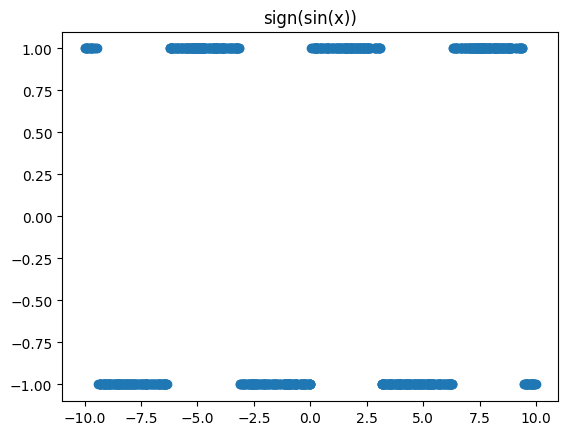

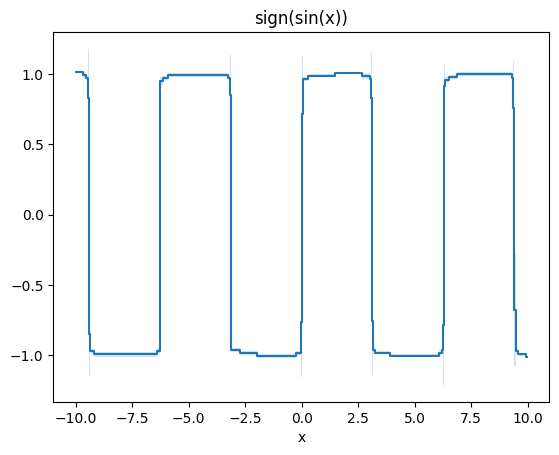

This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: x
Feature Type: continuous
Means: {"(-9.99, -9.69)": 1.013, "(-9.69, -9.53)": 0.992, "(-9.53, -9.47)": 0.971, "(-9.47, -9.43)": 0.827, "(-9.43, -9.38)": -0.849, "(-9.38, -9.19)": -0.973, "(-9.19, -6.42)": -0.993, "(-6.42, -6.28)": -0.971, "(-6.28, -6.16)": 0.949, "(-6.16, -5.92)": 0.971, "(-5.92, -3.25)": 0.993, "(-3.25, -3.16)": 0.972, "(-3.16, -3.14)": 0.847, "(-3.14, -3.12)": -0.849, "(-3.12, -2.74)": -0.965, "(-2.74, -1.99)": -0.986, "(-1.99, -0.24)": -1.006, "(-0.24, -0.03)": -0.985, "(-0.03, -0.01)": -0.926, "(-0.01, 0.01)": -0.763, "(0.01, 0.05)": 0.717, "(0.05, 0.27)": 0.966, "(0.27, 1.49)": 0.987, "(1.49, 2.65)": 1.007, "(2.65, 3.05)": 0.986, "(3.05, 3.08)": 0.966, "(3.08, 3.12)": 0.827, "(3.12, 3.15)": -0.761, "(3.15, 3.25)": -0.963, "(3.25, 3.92)": -0.984, "(3.92, 6.08)": -1.004, "(6.08, 6.22)": -0.982, "(6.22, 6.25)": -0.

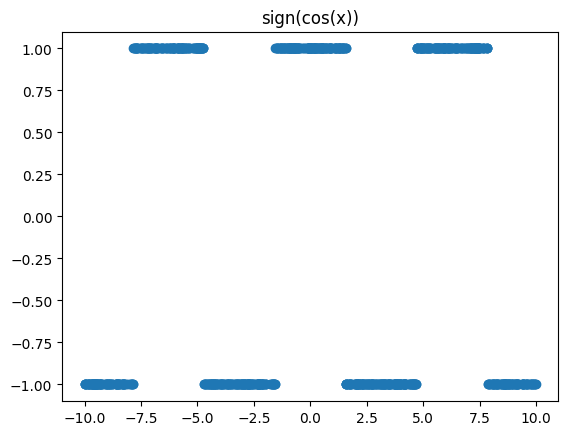

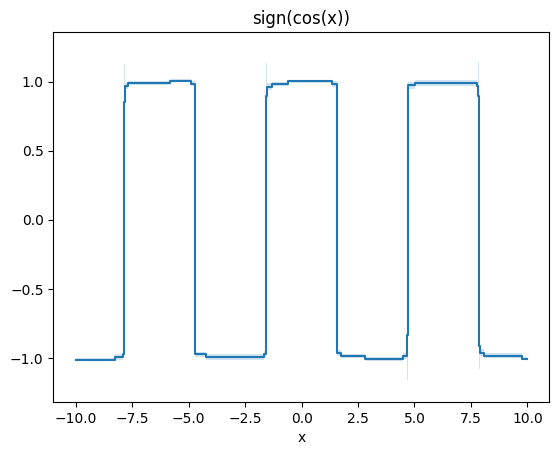

This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: x
Feature Type: continuous
Means: {"(-10.0, -8.26)": -1.013, "(-8.26, -7.92)": -0.992, "(-7.92, -7.87)": -0.972, "(-7.87, -7.86)": -0.915, "(-7.86, -7.83)": 0.856, "(-7.83, -7.69)": 0.966, "(-7.69, -5.83)": 0.987, "(-5.83, -4.89)": 1.007, "(-4.89, -4.74)": 0.986, "(-4.74, -4.72)": 0.703, "(-4.72, -4.71)": -0.827, "(-4.71, -4.26)": -0.974, "(-4.26, -1.68)": -0.994, "(-1.68, -1.59)": -0.974, "(-1.59, -1.58)": -0.911, "(-1.58, -1.56)": -0.794, "(-1.56, -1.54)": 0.893, "(-1.54, -1.3)": 0.963, "(-1.3, -0.62)": 0.983, "(-0.62, 1.36)": 1.004, "(1.36, 1.56)": 0.983, "(1.56, 1.56)": 0.871, "(1.56, 1.57)": 0.773, "(1.57, 1.57)": -0.891, "(1.57, 1.76)": -0.966, "(1.76, 2.8)": -0.986, "(2.8, 4.49)": -1.008, "(4.49, 4.67)": -0.986, "(4.67, 4.7)": -0.831, "(4.7, 4.72)": 0.776, "(4.72, 5.04)": 0.972, "(5.04, 7.76)": 0.993, "(7.76, 7.83)": 0.969, "(

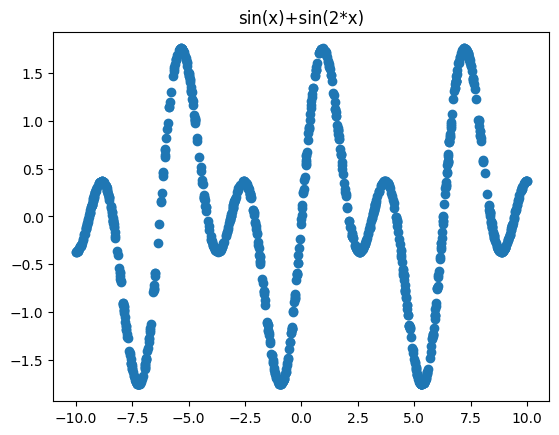

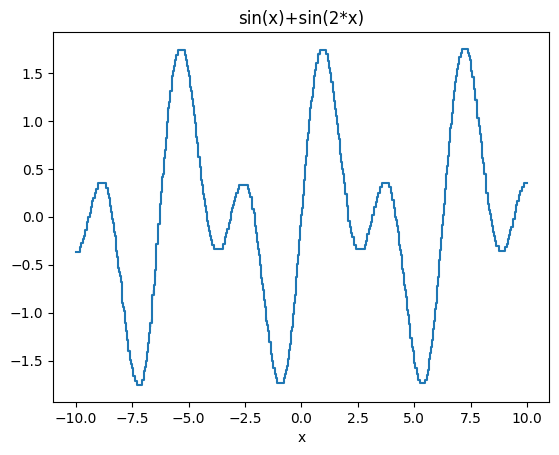

INFO: The graph of feature x was simplified by 8.6%.
This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: x
Feature Type: continuous
Means: {"(-10.0, -9.48)": -0.369, "(-9.48, -9.17)": -0.053, "(-9.17, -8.34)": 0.251, "(-8.34, -8.16)": -0.064, "(-8.16, -7.95)": -0.422, "(-7.95, -7.74)": -0.901, "(-7.74, -7.54)": -1.235, "(-7.54, -6.74)": -1.537, "(-6.74, -6.62)": -1.214, "(-6.62, -6.43)": -0.817, "(-6.43, -6.27)": -0.28, "(-6.27, -6.14)": 0.134, "(-6.14, -6.02)": 0.449, "(-6.02, -5.9)": 0.82, "(-5.9, -5.74)": 1.133, "(-5.74, -4.81)": 1.466, "(-4.81, -4.66)": 1.159, "(-4.66, -4.5)": 0.832, "(-4.5, -4.31)": 0.519, "(-4.31, -4.1)": 0.19, "(-4.1, -2.98)": -0.145, "(-2.98, -2.0)": 0.159, "(-2.0, -1.82)": -0.166, "(-1.82, -1.67)": -0.507, "(-1.67, -1.51)": -0.82, "(-1.51, -1.36)": -1.131, "(-1.36, -0.39)": -1.434, "(-0.39, -0.25)": -1.014, "(-0.25, -0.12)": -0.681, "(-0.12, -0.0)": -0.333, "

In [150]:
from interpret.glassbox import ExplainableBoostingRegressor

fbench_functions_as_text = []
for f, n in fbench:
    x = np.random.uniform(-10, 10, 1000)
    y = f(x)
    ebm = ExplainableBoostingRegressor(feature_names=['x'])  
    ebm.fit(x.reshape(-1, 1), y)
    ebm_global = ebm.explain_global()

    # plot the function
    plt.scatter(x, y)
    plt.title(n)
    plt.show()

    graph = graphs.extract_graph(ebm, 0)
    # add the intercept
    graph.scores = [x + ebm.intercept_ for x in graph.scores]
    #graphs.plot_graph(graph)
    graph = t2ebm.graphs.simplify_graph(graph, min_variation_per_cent=0.01)
    graphs.plot_graph(graph)
    plt.title(n)    
    plt.show()

    graph_as_text = graphs.graph_to_text(graph, max_tokens=1000, x_axis_precision=2, confidence_bounds=False)
    print(graph_as_text)
    fbench_functions_as_text.append(graph_as_text)

In [ ]:
fbench_functions_as_text

['This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.\n\nFeature Name: x\nFeature Type: continuous\nMeans: {"(-9.99, -9.57)": -9.99, "(-9.57, -9.17)": -9.56, "(-9.17, -8.76)": -9.16, "(-8.76, -8.53)": -8.75, "(-8.53, -8.07)": -8.49, "(-8.07, -7.89)": -8.07, "(-7.89, -7.44)": -7.85, "(-7.44, -7.22)": -7.42, "(-7.22, -6.8)": -7.2, "(-6.8, -6.37)": -6.77, "(-6.37, -6.12)": -6.33, "(-6.12, -5.9)": -6.09, "(-5.9, -5.45)": -5.87, "(-5.45, -5.03)": -5.45, "(-5.03, -4.6)": -5.03, "(-4.6, -4.18)": -4.6, "(-4.18, -3.73)": -4.16, "(-3.73, -3.26)": -3.69, "(-3.26, -2.87)": -3.26, "(-2.87, -2.44)": -2.85, "(-2.44, -2.03)": -2.43, "(-2.03, -1.6)": -2.01, "(-1.6, -1.18)": -1.6, "(-1.18, -0.77)": -1.19, "(-0.77, -0.35)": -0.76, "(-0.35, -0.1)": -0.31, "(-0.1, 0.33)": -0.09, "(0.33, 0.75)": 0.35, "(0.75, 1.19)": 0.77, "(1.19, 1.6)": 1.2, "(1.6, 2.02)": 1.61, "(2.02, 2.43)": 2.03, "(2.43, 2.87)": 2.45, "(2.87, 3.07)"

# Benchmark an LLM

In [135]:
cases = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)', 'i)', 'j)', 'k)', 'l)', 'm)', 'n)', 'o)', 'p)', 'q)', 'r)', 's)', 't)', 'u)', 'v)', 'w)', 'x)', 'y)', 'z)']
print(cases)

['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)', 'i)', 'j)', 'k)', 'l)', 'm)', 'n)', 'o)', 'p)', 'q)', 'r)', 's)', 't)', 'u)', 'v)', 'w)', 'x)', 'y)', 'z)']


In [151]:
for mc_options, solution in fbench_questions:
    print(f'Graph {fbench[solution][1]}\n')
    # initial description message
    graph_as_text = fbench_functions_as_text[solution]
    print(graph_as_text)
    prompt = t2ebm.prompts.describe_graph(
        graph_as_text, include_assistant_response=False
    )
    messages = t2ebm.utils.parse_guidance_query(prompt)
    # send query
    response = t2ebm.utils.openai_completion_query('gpt-4-turbo-2024-04-09', messages)
    # prepare next query
    messages.append({'role': 'assistant', 'content': response})
    mc_options = '\n'.join([f'{case} f(x)={fbench[option][1]}' for case, option in zip(cases, mc_options)])
    print('MC OPTIONS:')
    print(mc_options)
    mc_question = f"""It turns out that the graph closely approximates one of the following functions:

{mc_options}

Which of these functions is depicted in the graph? Think step by step.
"""    
    messages.append({'role': 'user', 'content': mc_question})
    # send query
    response = t2ebm.utils.openai_completion_query('gpt-4-turbo-2024-04-09', messages) 
    print(response)
    print('-'*80)

Graph -tanh(x) + 1/4 * x

This graph represents a continuous-valued feature. The keys are intervals that represent ranges where the function predicts the same value.

Feature Name: x
Feature Type: continuous
Means: {"(-9.99, -9.6)": -1.492, "(-9.6, -9.23)": -1.398, "(-9.23, -8.97)": -1.305, "(-8.97, -8.59)": -1.239, "(-8.59, -8.19)": -1.145, "(-8.19, -7.84)": -1.033, "(-7.84, -7.58)": -0.96, "(-7.58, -7.29)": -0.893, "(-7.29, -7.04)": -0.822, "(-7.04, -6.62)": -0.754, "(-6.62, -6.34)": -0.651, "(-6.34, -5.98)": -0.582, "(-5.98, -5.58)": -0.49, "(-5.58, -5.21)": -0.394, "(-5.21, -4.83)": -0.299, "(-4.83, -4.56)": -0.203, "(-4.56, -4.19)": -0.135, "(-4.19, -3.78)": -0.042, "(-3.78, -3.41)": 0.054, "(-3.41, -3.12)": 0.149, "(-3.12, -2.78)": 0.218, "(-2.78, -2.32)": 0.311, "(-2.32, -1.76)": 0.409, "(-1.76, -0.73)": 0.506, "(-0.73, -0.56)": 0.438, "(-0.56, -0.37)": 0.358, "(-0.37, -0.23)": 0.227, "(-0.23, -0.11)": 0.154, "(-0.11, -0.02)": 0.076, "(-0.02, 0.1)": 0.007, "(0.1, 0.21)": -0.084,

a) x
b) x^2
c) x^3
d) sin(x)
e) cos(x)
f) exp(x)
g) |x|
h) sinh(x)
i) cosh(x)
j) tanh(x)
k) arcsinh(x)
l) arctan(x)


In [ ]:
prompt = t2ebm.prompts.describe_graph(
    graph_as_text, include_assistant_response=True
)
prompt

'{{#system~}}\nYou are an expert statistician and data scientist.\n    \nYou interpret global explanations produced by a generalized additive model (GAM). GAMs produce explanations in the form of graphs that contain the effect of a specific input feature.\n\nYou will be given graphs from the model, and the user will ask you questions about the graphs. \n    \nAnswer all questions to the best of your ability, combining both the data contained in the graph and your knowledge about the real world.\n\nGraphs will be presented as a JSON object with keys representing the x-axis and values representing the y-axis. For continuous features, the keys are intervals that represent ranges where the function predicts the same value. For categorical features, each key represents a possible value that the feature can take.  \n    \nThe user will provide graphs in the following format:\n    - The name of the feature depicted in the graph\n    - The type of the feature (continuous, categorical, or boole

In [ ]:
messages = t2ebm.utils.parse_guidance_query(prompt)

In [ ]:
messages

[{'role': 'system',
  'content': 'You are an expert statistician and data scientist.\n    \nYou interpret global explanations produced by a generalized additive model (GAM). GAMs produce explanations in the form of graphs that contain the effect of a specific input feature.\n\nYou will be given graphs from the model, and the user will ask you questions about the graphs. \n    \nAnswer all questions to the best of your ability, combining both the data contained in the graph and your knowledge about the real world.\n\nGraphs will be presented as a JSON object with keys representing the x-axis and values representing the y-axis. For continuous features, the keys are intervals that represent ranges where the function predicts the same value. For categorical features, each key represents a possible value that the feature can take.  \n    \nThe user will provide graphs in the following format:\n    - The name of the feature depicted in the graph\n    - The type of the feature (continuous, ca

In [ ]:
response = t2ebm.utils.openai_completion_query('gpt-4o-2024-05-13', messages[:-1])
print(response)

The graph represents the effect of the continuous feature "feature_0000" on the output of the generalized additive model. Here's a detailed description of the general pattern from the data provided:

1. **Negative Values (Left Side of the Graph)**:
    - For highly negative values of "feature_0000", we observe mean values starting from around -1.527 for the interval (-9.96, -6.32).
    - As "feature_0000" increases towards less negative values, the mean values gradually increase (become less negative) until around -0.391 for the interval (-0.36, -0.31).

2. **Transition Around Zero**:
    - Around zero, we see the values transitioning from negative to positive. For example:
        - (-0.09, -0.05): -0.139
        - (-0.05, 0.0): -0.076
        - (0.0, 0.05): -0.028
        - (0.05, 0.11): 0.024
    - This indicates a crossing over to positive effects on the output.

3. **Positive Values (Right Side of the Graph)**:
    - For positive values of "feature_0000", we observe an increasing 

In [ ]:
new_messages = messages[:-1]

In [ ]:
new_messages.append({'role': 'assistant', 'content': response})
new_messages

[{'role': 'system',
  'content': 'You are an expert statistician and data scientist.\n    \nYou interpret global explanations produced by a generalized additive model (GAM). GAMs produce explanations in the form of graphs that contain the effect of a specific input feature.\n\nYou will be given graphs from the model, and the user will ask you questions about the graphs. \n    \nAnswer all questions to the best of your ability, combining both the data contained in the graph and your knowledge about the real world.\n\nGraphs will be presented as a JSON object with keys representing the x-axis and values representing the y-axis. For continuous features, the keys are intervals that represent ranges where the function predicts the same value. For categorical features, each key represents a possible value that the feature can take.  \n    \nThe user will provide graphs in the following format:\n    - The name of the feature depicted in the graph\n    - The type of the feature (continuous, ca

In [ ]:
mc_question = """It turns out that the depicted graph is one of the following functions:

a) f(x) = sin(x)
b) f(x) = cos(x)
c) f(x) = exp(x)
d) f(x) = |x|
e) f(x) = arctan(x)
f) f(x) = sinh(x)
g) f(x) = cosh(x)
h) f(x) = tanh(x)
i) f(x) = arcsinh(x)
j) f(x) = arctan(x) 

Your task now is to identify which of the functions is the one that generated the graph. Think step by step.
"""

In [ ]:
new_messages.append({'role': 'user', 'content': mc_question})
new_messages

[{'role': 'system',
  'content': 'You are an expert statistician and data scientist.\n    \nYou interpret global explanations produced by a generalized additive model (GAM). GAMs produce explanations in the form of graphs that contain the effect of a specific input feature.\n\nYou will be given graphs from the model, and the user will ask you questions about the graphs. \n    \nAnswer all questions to the best of your ability, combining both the data contained in the graph and your knowledge about the real world.\n\nGraphs will be presented as a JSON object with keys representing the x-axis and values representing the y-axis. For continuous features, the keys are intervals that represent ranges where the function predicts the same value. For categorical features, each key represents a possible value that the feature can take.  \n    \nThe user will provide graphs in the following format:\n    - The name of the feature depicted in the graph\n    - The type of the feature (continuous, ca

In [ ]:
response = t2ebm.utils.openai_completion_query('gpt-4o-2024-05-13', new_messages)
print(response)

To identify which of the provided functions is the one that generated the graph, we need to consider the general pattern steps I previously outlined in the data.

### Step-by-Step Analysis:
1. **Examine the Ending Values (For High Magnitudes of x)**:
   - For large positive and negative values of "feature_0000", whether \(x\) or \(-x\), the function seems to diverge (negative values become more negative and positive values become more positive).
   - This behavior primarily rules out functions that are periodic or bounded, such as \( \sin(x) \), \( \cos(x) \), \( \text{arctan}(x) \), \( \text{tanh}(x) \).

2. **Crossing Point Near Zero**:
   - There is a smooth crossing through zero, which matches functions like \(e^x\) and those with smooth transitions from negative to positive or those defined in such a way.
   - This crossing point further narrows down functions. Functions like \(e^x\) show exponential growth, but \(e^x\) doesn't cross from negative to positive.

3. **Behavior Aroun

In [ ]:
t2ebm.utils.parse_guidance_query(prompt)[0]['content']

'You are an expert statistician and data scientist.\n    \nYou interpret global explanations produced by a generalized additive model (GAM). GAMs produce explanations in the form of graphs that contain the effect of a specific input feature.\n\nYou will be given graphs from the model, and the user will ask you questions about the graphs. \n    \nAnswer all questions to the best of your ability, combining both the data contained in the graph and your knowledge about the real world.\n\nGraphs will be presented as a JSON object with keys representing the x-axis and values representing the y-axis. For continuous features, the keys are intervals that represent ranges where the function predicts the same value. For categorical features, each key represents a possible value that the feature can take.  \n    \nThe user will provide graphs in the following format:\n    - The name of the feature depicted in the graph\n    - The type of the feature (continuous, categorical, or boolean)\n    - Mea

In [ ]:
# TODO

- convert queries to the openai format
- write a cot execution function

- later port everything to the newest version of guidance? not required for the benchmarks at this point

In [ ]:
import guidance

In [ ]:
from guidance import models, gen

gpt = models.OpenAI('gpt-4-turbo-2024-04-09')

In [ ]:

gpt + gen(prompt)

ValueError: token_ids must contain some tokens.

In [ ]:
response = guidance(prompt, )()

TypeError: _Guidance.__call__() takes from 1 to 2 positional arguments but 3 were given